# 🌟 **GROUP FINAL PROJECT - GROUP 2** 🌟

---

## ✨ ***Ames Housing Dataset*** ✨

###  **TEAM MEMBER**  
| STT | Full Name | StudentID |
|-----|-----------|------|
| 1   | ***Doãn Quốc Bảo***    | ***11230599*** |
| 2   | ***Nguyễn Thị Mai Anh***     | ***11230599*** |
| 3   | ***Hà Quang Minh***     | ***11230599***  |
| 4   | ***Nguyễn Trần Tuấn Kiệt***    | ***11230599*** |
| 5   | ***Trịnh Minh Hiếu***     | ***11230599***  |

# **Stage 1: Data Collecting**

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv("AmesHousing.csv")
checking_error = df.copy()
skew = df.copy()

In [347]:
# sau khi phân tích ở stage 5 thì quay lại xóa dòng chứa outlier
indices_to_drop = [1498, 2180, 2181, 746, 1258, 426, 1497, 2260]
df = df.drop(index=indices_to_drop, axis=0)

# **Stage 2: Initial Data Inspection**

## **2.1 Kiểm tra tổng quan**

In [348]:
display(df.head(5))

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [349]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2922 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2922 non-null   int64  
 1   PID              2922 non-null   int64  
 2   MS SubClass      2922 non-null   int64  
 3   MS Zoning        2922 non-null   object 
 4   Lot Frontage     2432 non-null   float64
 5   Lot Area         2922 non-null   int64  
 6   Street           2922 non-null   object 
 7   Alley            197 non-null    object 
 8   Lot Shape        2922 non-null   object 
 9   Land Contour     2922 non-null   object 
 10  Utilities        2922 non-null   object 
 11  Lot Config       2922 non-null   object 
 12  Land Slope       2922 non-null   object 
 13  Neighborhood     2922 non-null   object 
 14  Condition 1      2922 non-null   object 
 15  Condition 2      2922 non-null   object 
 16  Bldg Type        2922 non-null   object 
 17  House Style      29

In [350]:
df.columns = [c.strip() for c in df.columns]
numeric_cols_before   = df.select_dtypes(include=[np.number]).columns.tolist()
datetime_cols_before  = df.select_dtypes(include=["datetime64[ns]"]).columns.tolist()
bool_cols_before      = df.select_dtypes(include=["bool"]).columns.tolist()
object_cols_before    = df.select_dtypes(include=["object"]).columns.tolist()

print(f"Numeric ({len(numeric_cols_before)} cols):   {numeric_cols_before}")
print(f"Datetime ({len(datetime_cols_before)} cols): {datetime_cols_before}")
print(f"Boolean ({len(bool_cols_before)} cols):      {bool_cols_before}")
print(f"Object ({len(object_cols_before)} cols):     {object_cols_before}") 

Numeric (39 cols):   ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']
Datetime (0 cols): []
Boolean (0 cols):      []
Object (43 cols):     ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Ex

**`Dữ liệu có 2930 entries và 82 Feature.`**

**`Data type of initial Feature:`**

| **Data Type** | **Number** | **Feature Name** |
| :--- | :---: | :--- |
| **Numeric** | 39 | `Order`, `PID`, `MS SubClass`, `Lot Frontage`, `Lot Area`, `Overall Qual`, `Overall Cond`, `Year Built`, `Year Remod/Add`, `Mas Vnr Area`, `BsmtFin SF 1`, `BsmtFin SF 2`, `Bsmt Unf SF`, `Total Bsmt SF`, `1st Flr SF`, `2nd Flr SF`, `Low Qual Fin SF`, `Gr Liv Area`, `Bsmt Full Bath`, `Bsmt Half Bath`, `Full Bath`, `Half Bath`, `Bedroom AbvGr`, `Kitchen AbvGr`, `TotRms AbvGrd`, `Fireplaces`, `Garage Yr Blt`, `Garage Cars`, `Garage Area`, `Wood Deck SF`, `Open Porch SF`, `Enclosed Porch`, `3Ssn Porch`, `Screen Porch`, `Pool Area`, `Misc Val`, `Mo Sold`, `Yr Sold`, `SalePrice` |
| **Datetime** | 0 | **NaN** |
| **Object** | 43 | `MS Zoning`, `Street`, `Alley`, `Lot Shape`, `Land Contour`, `Utilities`, `Lot Config`, `Land Slope`, `Neighborhood`, `Condition 1`, `Condition 2`, `Bldg Type`, `House Style`, `Roof Style`, `Roof Matl`, `Exterior 1st`, `Exterior 2nd`, `Mas Vnr Type`, `Exter Qual`, `Exter Cond`, `Foundation`, `Bsmt Qual`, `Bsmt Cond`, `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2`, `Heating`, `Heating QC`, `Central Air`, `Electrical`, `Kitchen Qual`, `Functional`, `Fireplace Qu`, `Garage Type`, `Garage Finish`, `Garage Qual`, `Garage Cond`, `Paved Drive`, `Pool QC`, `Fence`, `Misc Feature`, `Sale Type`, `Sale Condition` |
| **Boolean** | 0 | **NaN** |

## **2.2 Diễn giải chi tiết ý nghĩa của từng Feature**

### **2.2.1 Nhóm Thông tin Định danh và Tổng quan (Identification & Overview)**

`Nhóm này chứa các thông tin dùng để xác định bất động sản và loại hình cư trú.`

* **`Order`num**: Số thứ tự quan sát trong bộ dữ liệu (Index).

* **`PID`num**: Mã số định danh lô đất (Parcel Identification Number) dùng trong hồ sơ thuế.

* **`MS SubClass`**: Mã số xác định loại nhà ở 

* **`MS Zoning`**: Phân loại quy hoạch sử dụng đất (Nông nghiệp, Thương mại, Dân cư mật độ thấp/cao...).

* **`Bldg Type`**: Loại hình nhà ở (Gia đình đơn, Nhà phố cuối dãy, Nhà phố giữa dãy, Hai gia đình...).

* **`House Style`**: Kiểu dáng nhà ở (1 tầng, 1.5 tầng, 2 tầng, Split Foyer...).


### **2.2.2 Nhóm Vị trí và Đặc điểm Lô đất (Location & Lot Information)**

`Mô tả vị trí địa lý và đặc tính vật lý của lô đất.`

* **`Lot Frontage`**: Diện tích lô đất phía trước, Chiều dài mặt tiền của lô đất tiếp giáp với đường (feet). (Lot Frontage)

* **`Lot Area`**: Tổng diện tích lô đất (Lot Area) (sq ft).

* **`Street`**: Loại đường tiếp cận lô đất (Rải nhựa - Pave, Sỏi - Grvl).

* **`Alley`**: Loại đường vào ngõ (nếu có) (Rải nhựa, Sỏi, Không có).

* **`Lot Shape`**: Hình dạng lô đất (Regular, Irregular, Slightly Sloped, Moderately Sloped).

* **`Land Contour`**: Độ bằng phẳng của lô đất (Bằng phẳng, Dốc, Lõm, Sườn đồi).

* **`Lot Config`**: Cấu hình lô đất (Lô góc, Lô giữa, Lô cụt...).

* **`Land Slope`**: Độ dốc của lô đất (Thoải, Trung bình, Dốc đứng).

* **`Neighborhood`**: Tên khu phố/khu dân cư trong thành phố Ames (yếu tố quan trọng ảnh hưởng giá).

* **`Condition 1`**: Điều kiện vị trí gần các trục đường chính hoặc đường sắt.

* **`Condition 2`**: Điều kiện vị trí thứ 2 (nếu có nhiều hơn một yếu tố vị trí đặc biệt).

### **2.2.3 Nhóm Tiện ích và Chất lượng Tổng thể (Utilities & Quality Ratings)**

`Đánh giá chung về chất lượng xây dựng và tình trạng ngôi nhà.`

* **`Utilities`**: Các tiện ích công cộng có sẵn (Điện, Nước, Gas, Bể phốt).

* **`Overall Qual`**: Đánh giá tổng thể về chất lượng vật liệu và hoàn thiện (Thang 1-10: Rất kém đến Rất tốt).

* **`Overall Cond`**: Đánh giá tình trạng tổng thể hiện tại của ngôi nhà (Thang 1-10) (Overall Condition Rating).

* **`Year Built`**: Năm xây dựng.

* **`Year Remod/Add`**: Năm sửa chữa, cải tạo hoặc xây thêm (giống Year Built nếu không sửa chữa).

### **2.2.4 Nhóm Ngoại thất (Exterior Features)**

`Mô tả vật liệu và tình trạng bên ngoài ngôi nhà.`

* **`Roof Style`**: Kiểu mái nhà (Mái dốc, Mái chóp, Mái bằng...).

* **`Roof Matl`**: Vật liệu lợp mái (Ngói, Tấm lợp, Gỗ...).

* **`Exterior 1st`**: Vật liệu phủ tường ngoại thất chính.

* **`Exterior 2nd`**: Vật liệu phủ tường ngoại thất phụ(nếu có).

* **`Mas Vnr Type`**: Loại lớp ốp gạch/đá trang trí (Masonry veneer) (Gạch, Đá, Không có...).

* **`Mas Vnr Area`**: Diện tích lớp ốp gạch/đá trang trí (Masonry veneer) (m2).

* **`Exter Qual`**: Đánh giá chất lượng vật liệu ngoại thất (Tốt, Trung bình, Kém...).

* **`Exter Cond`**: Đánh giá tình trạng hiện tại của vật liệu ngoại thất.

* **`Foundation`**: Loại móng nhà (Bê tông, Gạch, Đá, Gỗ...).

### **2.2.5 Nhóm Tầng hầm (Basement Features)**

`Thông tin chi tiết về diện tích và chất lượng tầng hầm.`

* **`Bsmt Qual`**: Chiều cao của tầng hầm (đánh giá không gian).

* **`Bsmt Cond`**: Đánh giá tình trạng hiện tại của tầng hầm (Tốt, Trung bình, Kém...).

* **`Bsmt Exposure`**: Độ lộ thiên của tầng hầm (tường hầm có cửa sổ/cửa đi ra ngoài không).

* **`BsmtFin Type 1`**: Xếp loại chất lượng của khu vực hoàn thiện thứ nhất trong hầm.

* **`BsmtFin SF 1`**: Diện tích hoàn thiện của khu vực 1 (square feet).

* **`BsmtFin Type 2`**: Xếp loại chất lượng của khu vực hoàn thiện thứ hai (nếu có).

* **`BsmtFin SF 2`**: Diện tích hoàn thiện của khu vực 2 (square feet).

* **`Bsmt Unf SF`**: Diện tích chưa hoàn thiện của tầng hầm (square feet).

* **`Total Bsmt SF`**: Tổng diện tích tầng hầm (Total Basement Square Feet).

### **2.2.6 Nhóm Hệ thống Cơ điện (Systems & HVAC)**

`Hệ thống sưởi, làm mát và điện.`

* **`Heating`**: Loại hệ thống sưởi (Lò sưởi khí, Sưởi sàn...).

* **`Heating QC`**: Chất lượng và tình trạng hệ thống sưởi.

* **`Central Air`**: Có hệ thống điều hòa trung tâm hay không (Y/N).

* **`Electrical`**: Loại hệ thống điện (Cầu dao tiêu chuẩn, Cầu chì...).

### **2.2.7 Nhóm Diện tích Sống và Nội thất (Living Area & Interior)**

`Chi tiết về không gian sống trên mặt đất.`

* **`1st Flr SF`**: Diện tích tầng 1 (tầng trệt) (square feet).

* **`2nd Flr SF`**: Diện tích tầng 2 (square feet).

* **`Low Qual Fin SF`**: Diện tích hoàn thiện chất lượng thấp (tất cả các tầng).

* **`Gr Liv Area`**: Tổng diện tích sống trên mặt đất (không tính hầm) (Ground Living Area).

* **`Bsmt Full Bath`**: Số phòng tắm đầy đủ dưới tầng hầm (Basement Full Bathrooms).

* **`Bsmt Half Bath`**: Số phòng vệ sinh (không có tắm) dưới tầng hầm.

* **`Full Bath`**: Số phòng tắm đầy đủ trên mặt đất.

* **`Half Bath`**:  Số phòng vệ sinh trên mặt đất.

* **`Bedroom AbvG`**: Số phòng ngủ trên mặt đất (không tính hầm).

* **`Kitchen AbvGr`**: Số phòng bếp trên mặt đất.

* **`Kitchen Qual`**: Đánh giá chất lượng nhà bếp

* **`TotRms AbvGrd`**: Tổng số phòng trên mặt đất (không tính hầm).

* **`Functional`**: Đánh giá công năng của ngôi nhà (Bình thường, Hư hỏng nhẹ, Hư hỏng nặng...).

* **`Fireplaces`**: Số lượng lò sưởi trong nhà.

* **`Fireplace Qu`**: Đánh giá chất lượng lò sưởi.

### **2.2.8 Nhóm Garage (Garage Features)**

`Thông tin về nơi để xe.`

* **`Garage Type`**: Vị trí/Kiểu garage (Gắn liền nhà, Tách biệt, Tầng hầm...).

* **`Garage Yr Blt`**: Năm xây dựng garage (nếu có).

* **`Garage Finish`**: Trạng thái hoàn thiện bên trong garage (Thô, Dở dang, Hoàn thiện).

* **`Garage Cars`**: Sức chứa của garage (tính theo số lượng ô tô).

* **`Garage Area`**: Diện tích của garage (tính theo mét vuông).

* **`Garage Qual`**: Đánh giá chất lượng garage.

* **`Garage Cond`**: Tình trạng garage.

* **`Paved Drive`**:  Đường lái xe vào garage có rải nhựa không (Y/N/P).

### **2.2.9 Nhóm Tiện ích Ngoài trời & Khác (Outdoor & Misc)**

`Các không gian thư giãn và tiện ích phụ trợ.`

* **`Wood Deck SF`**: Diện tích sàn gỗ ngoài trời (square feet).

* **`Open Porch SF`**: Diện tích hiên nhà mở (Open Porch).

* **`Enclosed Porch`**: Diện tích hiên nhà kín (Enclosed Porch).

* **`3Ssn Porch`**: Diện tích hiên nhà 3 mùa (Three season porch).

* **`Screen Porch`**: Diện tích hiên nhà có lưới chắn (Screen porch).

* **`Pool Area`**: Diện tích hồ bơi (square feet).

* **`Pool QC`**: Chất lượng hồ bơi.

* **`Fence`**:  Chất lượng hàng rào (Riêng tư, Gỗ, Kém...).

* **`Misc Feature`**: Các tính năng khác không thuộc các nhóm trên (Thang máy, Sân tennis...).

* **`Misc Val`**:  Giá trị ($) của các tính năng khác (Misc Feature).

### **2.2.10 Nhóm Thông tin Giao dịch (Sale Information)**

`Thông tin về việc mua bán - Đây là nhóm chứa biến mục tiêu.`

* **`Mo Sold`**: Tháng bán nhà (1-12).

* **`Yr Sold`**: Năm bán nhà (2006-2010).

* **`Sale Type`**: Loại hình giao dịch (Bán thường, Bảo hành, Tịch biên...).

* **`Sale Condition`**: Tình trạng bán hàng

* **`SalePrice`**: **Biến mục tiêu**: Giá bán tài sản tính bằng USD.

## **2.3 Detailled Data Type of Raw Features**

**`Numerical: Quantitative features:`**

* **Continuous:** Là các biến đo lường, có thể nhận bất kỳ giá trị nào trong một khoảng (thường là diện tích hoặc tiền).

    * **Diện tích đất/nhà:** `Lot Frontage`, `Lot Area`, `Mas Vnr Area`, `BsmtFin SF 1`, `BsmtFin SF 2`, `Bsmt Unf SF`, `Total Bsmt SF`, `1st Flr SF`, `2nd Flr SF`, `Low Qual Fin SF`, `Gr Liv Area`, `Garage Area`, `Wood Deck SF`, `Open Porch SF`, `Enclosed Porch`, `3Ssn Porch`, `Screen Porch`, `Pool Area`

    * **Giá trị tiền:** `Misc Val`, `SalePrice`

* **Discrete:** Là các biến đếm số lượng hoặc thời gian (năm/tháng).
    * **Thời gian:** `Year Built`, `Year Remod/Add`, `Garage Yr Blt`, `Mo Sold`, `Yr Sold`

    * **Số lượng phòng/thiết bị:** `Bsmt Full Bath`, `Bsmt Half Bath`, `Full Bath`, `Half Bath`, `Bedroom AbvGr`, `Kitchen AbvGr`, `TotRms AbvGrd`, `Fireplaces`, `Garage Cars`

     * **Mã định danh:** `Order`, `PID`

**`Categorical: Qualitative features:`**

* **Nominal:** Là các biến phân loại mà giữa các giá trị không có thứ bậc hơn kém (Vd: Màu xanh không "lớn hơn" màu đỏ).

    * **Vị trí/Quy hoạch:** `MS Zoning`, `Street`, `Alley`, `Land Contour`, `Lot Config`, `Neighborhood`, `Condition 1`, `Condition 2`

    * **Kiểu dáng/Vật liệu:** `Bldg Type`, `House Style`, `Roof Style`, `Roof Matl`, `Exterior 1st`, `Exterior 2nd`, `Mas Vnr Type`, `Foundation`, `Garage Type`, `Misc Feature`

    * **Hệ thống kỹ thuật:** `Heating`, `Central Air`, `Electrical`

    * **Thông tin bán hàng:** `Sale Type`, `Sale Condition`

    * **Đặc biệt:** `MS SubClass` (Dù là số nhưng nó là mã định danh loại nhà, không phải đại lượng đo lường).

* **Ordinal:** Là các biến phân loại nhưng có thứ bậc rõ ràng (Vd: Tốt > Khá > Trung bình).

    * **Đánh giá tổng quan(Numerical Rating):** `Overall Qual` (1-10), `Overall Cond` (1-10)

    * **Đánh giá chất lượng (Ex/Gd/TA/Fa/Po):** `Exter Qual`, `Exter Cond`, `Bsmt Qual`, `Bsmt Cond`, `Heating QC`, `Kitchen Qual`, `Fireplace Qu`, `Garage Qual`, `Garage Cond`, `Pool QC`

     * **Mức độ hoàn thiện/Tình trạng:** `Lot Shape`, `Utilities`, `Land Slope`, `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2`, `Functional`, `Garage Finish`, `Paved Drive`, `Fence`


## **2.4 Target Feature `SalePrice`**

### **2.4.1 Phân tích phân phối và độ lệch**

In [351]:
df = df[df['Gr Liv Area'] < 4000]
y_raw = df['SalePrice']

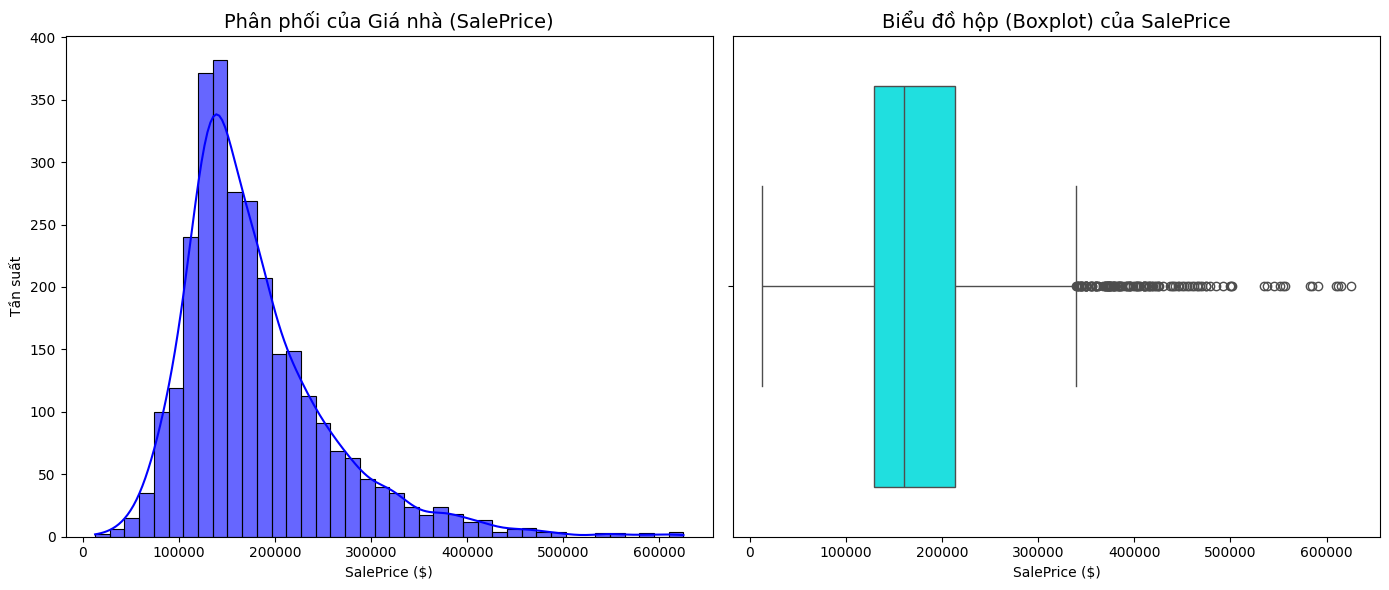

Thống kê mô tả cho SalePrice:
count      2920.000000
mean     180353.788699
std       78560.277524
min       12789.000000
25%      129475.000000
50%      160000.000000
75%      213310.000000
max      625000.000000
Name: SalePrice, dtype: float64
Độ lệch (Skewness): 1.59
Độ nhọn (Kurtosis): 3.85


In [352]:
# Thiết lập kích thước biểu đồ
plt.figure(figsize=(14, 6))

# 1. Biểu đồ Histogram kết hợp đường KDE (Kernel Density Estimate)
plt.subplot(1, 2, 1)
sns.histplot(y_raw, kde=True, bins=40, color='blue', alpha=0.6)
plt.title('Phân phối của Giá nhà (SalePrice)', fontsize=14)
plt.xlabel('SalePrice ($)')
plt.ylabel('Tần suất')

# 2. Biểu đồ Boxplot để kiểm tra Outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=y_raw, color='cyan')
plt.title('Biểu đồ hộp (Boxplot) của SalePrice', fontsize=14)
plt.xlabel('SalePrice ($)')

plt.tight_layout()
plt.show()

# Hiển thị các chỉ số thống kê chi tiết
print("Thống kê mô tả cho SalePrice:")
print(y_raw.describe())
print(f"Độ lệch (Skewness): {y_raw.skew():.2f}")
print(f"Độ nhọn (Kurtosis): {y_raw.kurt():.2f}")


**`From this table, some quick observations can be made:`**

* **Hình dáng phân phối (Distribution Shape):** 
    * $Skewness = 1.75 (> 0)$: Phân phối lệch phải (Right-skewed). Phần lớn các ngôi nhà có giá ở mức trung bình thấp, nhưng có một phần nhỏ (đuôi bên phải) là những ngôi nhà có giá rất cao. 
    * $Kurtosis = 5.42 (> 3)$: Phân phối có độ nhọn cao (Leptokurtic). Điều này ám chỉ rằng dữ liệu tập trung dày đặc quanh vùng trung tâm và có đuôi dài, xuất hiện nhiều giá trị ngoại lai (outliers) hơn so với phân phối chuẩn.

* **Giá trị ngoại lai (Outliers):** Nhìn vào Boxplot, ta thấy xuất hiện rất nhiều điểm đen nằm ngoài râu (whiskers) phía bên phải. Giá trị Max lên tới $755,000 USD$, trong khi $75\%$ số lượng nhà có giá dưới $213,000 USD$. Đây là những điểm dị biệt thực sự (nhà siêu sang/biệt thự) cần lưu ý khi xây dựng mô hình. Cho thấy phần lớn các ngôi nhà có giá trung bình thấp, nhưng có một số ít ngôi nhà giá cực cao (ngoại lai) cần mô hình xử lý cẩn thận để không dự báo sai lệch cho số đông.

* **Kết luận cho tiền xử lý:** Do dữ liệu bị lệch phải nặng, khi đưa vào các mô hình tuyến tính (Linear Regression), ta nên thực hiện biến đổi Log (Log-transformation) cho SalePrice (ví dụ: np.log1p(SalePrice)) để đưa phân phối về dạng gần chuẩn (Normal distribution) hơn, giúp mô hình dự đoán chính xác hơn.

### **2.4.2 Skewness Handling**

Skewness trước: 1.59
Skewness sau: -0.04


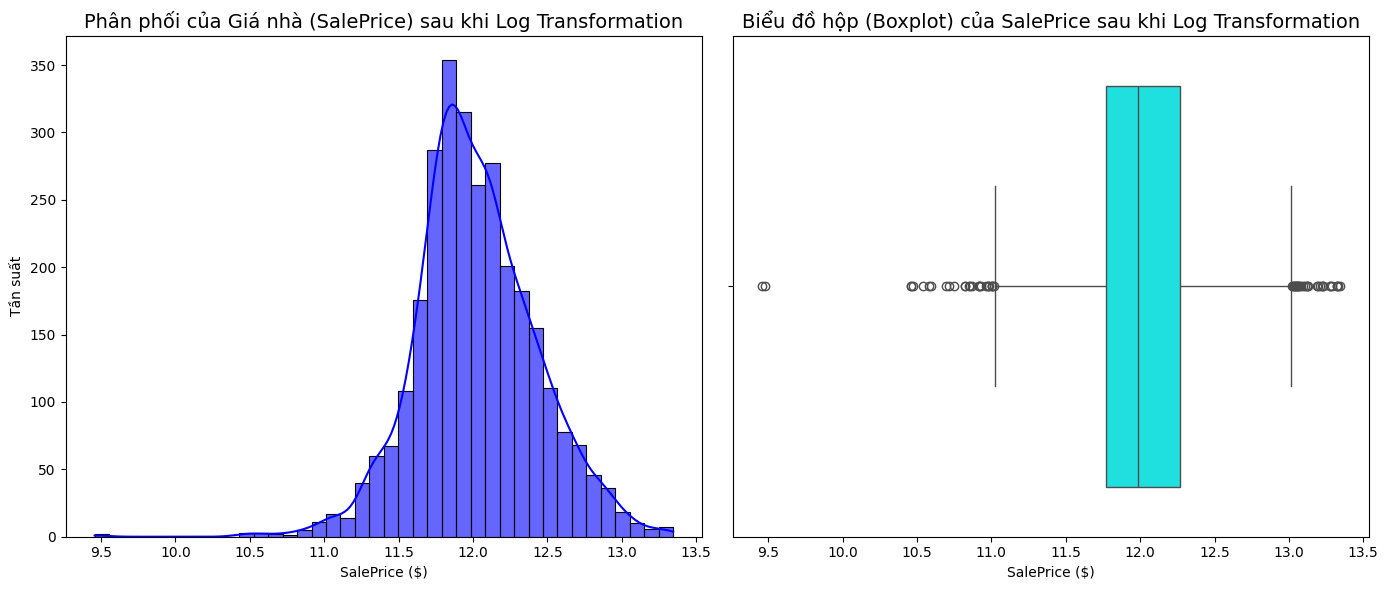

Thống kê mô tả cho SalePrice sau khi Log Transformation:
count    2920.000000
mean       12.019549
std         0.406023
min         9.456419
25%        11.771251
50%        11.982935
75%        12.270506
max        13.345509
Name: SalePrice, dtype: float64
Độ lệch (Skewness): -0.04
Độ nhọn (Kurtosis): 1.47


In [353]:
print(f"Skewness trước: {y_raw.skew():.2f}")
y_log = np.log1p(df['SalePrice']) 
print(f"Skewness sau: {y_log.skew():.2f}")
# Thiết lập kích thước biểu đồ
plt.figure(figsize=(14, 6))

# 1. Biểu đồ Histogram kết hợp đường KDE (Kernel Density Estimate)
plt.subplot(1, 2, 1)
sns.histplot(y_log, kde=True, bins=40, color='blue', alpha=0.6)
plt.title('Phân phối của Giá nhà (SalePrice) sau khi Log Transformation', fontsize=14)
plt.xlabel('SalePrice ($)')
plt.ylabel('Tần suất')

# 2. Biểu đồ Boxplot để kiểm tra Outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=y_log, color='cyan')
plt.title('Biểu đồ hộp (Boxplot) của SalePrice sau khi Log Transformation', fontsize=14)
plt.xlabel('SalePrice ($)')

plt.tight_layout()
plt.show()

# Hiển thị các chỉ số thống kê chi tiết
print("Thống kê mô tả cho SalePrice sau khi Log Transformation:")
print(y_log.describe())
print(f"Độ lệch (Skewness): {y_log.skew():.2f}")
print(f"Độ nhọn (Kurtosis): {y_log.kurt():.2f}")


**=> Kết quả này CỰC KỲ ỔN, thậm chí có thể gọi là Tuyệt vời.**

## **2.5 Xử lý lỗi thô**

### **2.5.1 Kiểm tra duplicate**

In [354]:
duplicate_rows = df.duplicated(keep='first')
total_duplicate_rows = duplicate_rows.sum()
print(total_duplicate_rows)

0


**`=> Không có dữ liệu bị trùng lặp`**

### **2.5.2 Các Feature gặp vấn đề**

**Các biến phân loại đang bị hiểu là số:** `Đây là những cột chứa các con số mã hóa cho các hạng mục. Nếu để nguyên là số, mô hình máy học có thể hiểu sai rằng giá trị lớn hơn thì "tốt hơn" hoặc "cao hơn" (ví dụ: loại nhà 60 lớn gấp 3 lần loại nhà 20), điều này là sai.`

* **`MS SubClass`**: Đang là int64. Mã loại nhà (ví dụ: 20 = 1 tầng, 60 = 2 tầng...). Nên Chuyển sang dạng Object (String) hoặc Category.

* **`Mo Sold`**: Đang là int64. Mã tháng bán hàng (ví dụ: 1 = tháng 1, 2 = tháng 2...). Nên coi là Category vì tháng 12 không nhất thiết "lớn hơn" tháng 1 về mặt giá trị dự đoán (trừ khi muốn giữ tính chất chu kỳ).

**Các biến định danh (ID):** `Các cột này là số nhưng chỉ dùng để định danh, không mang ý nghĩa tính toán hay dự báo. Vì vậy nên sẽ loại bỏ`

* **`Order`:** Số thứ tự. 

* **`PID`:** Mã định danh lô đất (Parcel ID).


In [355]:
cols_to_drop = ['Order', 'PID'] 
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
df.head(10)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1616,1.0,0.0,2,0,2,1,Gd,5,Typ,1,TA,Attchd,1995.0,RFn,2.0,608.0,TA,TA,Y,237,152,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2920 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2920 non-null   int64  
 1   MS Zoning        2920 non-null   object 
 2   Lot Frontage     2430 non-null   float64
 3   Lot Area         2920 non-null   int64  
 4   Street           2920 non-null   object 
 5   Alley            197 non-null    object 
 6   Lot Shape        2920 non-null   object 
 7   Land Contour     2920 non-null   object 
 8   Utilities        2920 non-null   object 
 9   Lot Config       2920 non-null   object 
 10  Land Slope       2920 non-null   object 
 11  Neighborhood     2920 non-null   object 
 12  Condition 1      2920 non-null   object 
 13  Condition 2      2920 non-null   object 
 14  Bldg Type        2920 non-null   object 
 15  House Style      2920 non-null   object 
 16  Overall Qual     2920 non-null   int64  
 17  Overall Cond     29

### **2.5.3 Phân tích và Chiến lược Xử lý Missing Value**

`Kiểm tra missing value và diễn giải lí do cho sự missing này cũng như đưa ra phương án giải quyết`

In [357]:
# số lượng và tỷ lệ thiếu theo cột
missing_values = df.isna().sum()
missing_number = missing_values[missing_values > 0]
missing_ratio = (df.isna().mean() * 100).round(2)
missing_ratio = missing_ratio[missing_ratio > 0]
missing_table = pd.DataFrame({
    "Missing Count": missing_number,
    "Missing Ratio (%)": missing_ratio
})
missing_table = missing_table.sort_values("Missing Ratio (%)", ascending=False)
print(missing_table)

                Missing Count  Missing Ratio (%)
Pool QC                  2909              99.62
Misc Feature             2815              96.40
Alley                    2723              93.25
Fence                    2350              80.48
Mas Vnr Type             1770              60.62
Fireplace Qu             1421              48.66
Lot Frontage              490              16.78
Garage Qual               159               5.45
Garage Cond               159               5.45
Garage Yr Blt             159               5.45
Garage Finish             159               5.45
Garage Type               157               5.38
Bsmt Exposure              82               2.81
BsmtFin Type 2             80               2.74
Bsmt Cond                  79               2.71
Bsmt Qual                  79               2.71
BsmtFin Type 1             79               2.71
Mas Vnr Area               22               0.75
BsmtFin SF 1                1               0.03
BsmtFin SF 2        

In [358]:
display(df.head(20))

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1616,1.0,0.0,2,0,2,1,Gd,5,Typ,1,TA,Attchd,1995.0,RFn,2.0,608.0,TA,TA,Y,237,152,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


**`Chúng ta áp dụng logic "Mạnh tay để đơn giản hóa" (Aggressive Simplification) dựa trên các quy tắc sau:`**

* **Ngưỡng loại bỏ 15%:** Nếu một biến thiếu quá 15% dữ liệu, ta coi như biến đó không tồn tại và xóa bỏ.

    * Các biến bị xóa: `Pool QC`, `Misc Feature`,`Alley`, `Fence`, `Fireplace Qu`. Một phần lí do là bởi thông tin của các biến này đều đã được thể hiện bởi một biến khác.
    
        * `Pool QC` có giá trị "NaN" khi `Pool Area` là "0".
        
        * `Fireplace Qu` có giá trị "NaN" khi `Fireplaces Qu` là "0".


In [359]:
cols_to_drop = ['Pool QC', 'Misc Feature','Alley', 'Fence', 'Fireplace Qu'] 
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
df.head(10)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900
5,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal,195500
6,120,RL,41.0,4920,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,0,4,2010,WD,Normal,213500
7,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,191500
8,120,RL,39.0,5389,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1616,1.0,0.0,2,0,2,1,Gd,5,Typ,1,Attchd,1995.0,RFn,2.0,608.0,TA,TA,Y,237,152,0,0,0,0,0,3,2010,WD,Normal,236500
9,60,RL,60.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,TA,TA,No,Unf,0.0,Unf,0.0,994.0,994.0,GasA,Gd,Y,SBrkr,1028,776,0,1804,0.0,0.0,2,1,3,

## **2.6 Feature Engineering**


### Tạo biến mới: `TotalSF` – Tổng diện tích sàn sử dụng

Biến `TotalSF` được tạo ra nhằm **tổng hợp toàn bộ diện tích sàn sử dụng của căn nhà**, bao gồm:

- **`Total Bsmt SF`**: diện tích tầng hầm (Basement)  
- **`1st Flr SF`**: diện tích tầng 1  
- **`2nd Flr SF`**: diện tích tầng 2  

Mục đích của việc tạo biến này là:
- Giúp mô hình **nắm bắt chính xác quy mô tổng thể của ngôi nhà**, thay vì xem từng tầng riêng lẻ.  
- Tạo một đặc trưng (feature) có **mối tương quan cao với giá bán (`SalePrice`)**, thường được sử dụng trong các nghiên cứu và cuộc thi dự đoán giá nhà (ví dụ như Kaggle Ames Housing).  
- Giúp **đơn giản hóa việc phân tích và trực quan hóa** – thay vì vẽ nhiều biểu đồ cho từng tầng, ta có thể tập trung vào `TotalSF` để thấy mối quan hệ tổng thể.

In [360]:
df['TotalSF'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF']

# **Stage 3: Chia dữ liệu (Train / Test Split)**

In [ ]:
# chia data ngẫu nhiên theo train 70% test 30%
X_train, X_test, y_train_log, y_test_log = train_test_split(df, y_log, test_size=0.3, random_state=42)

# **Stage 4: Phân tích đơn biến**

## **4.1 Quantitative Attributes**

In [362]:
numeric_cols_of_X_train = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols_of_X_train = X_train.select_dtypes(include=['object']).columns.tolist()
    
print(f"Số biến numeric: {len(numeric_cols_of_X_train)}")
print(f"Số biến categorical: {len(categorical_cols_of_X_train)}")

Số biến numeric: 38
Số biến categorical: 38


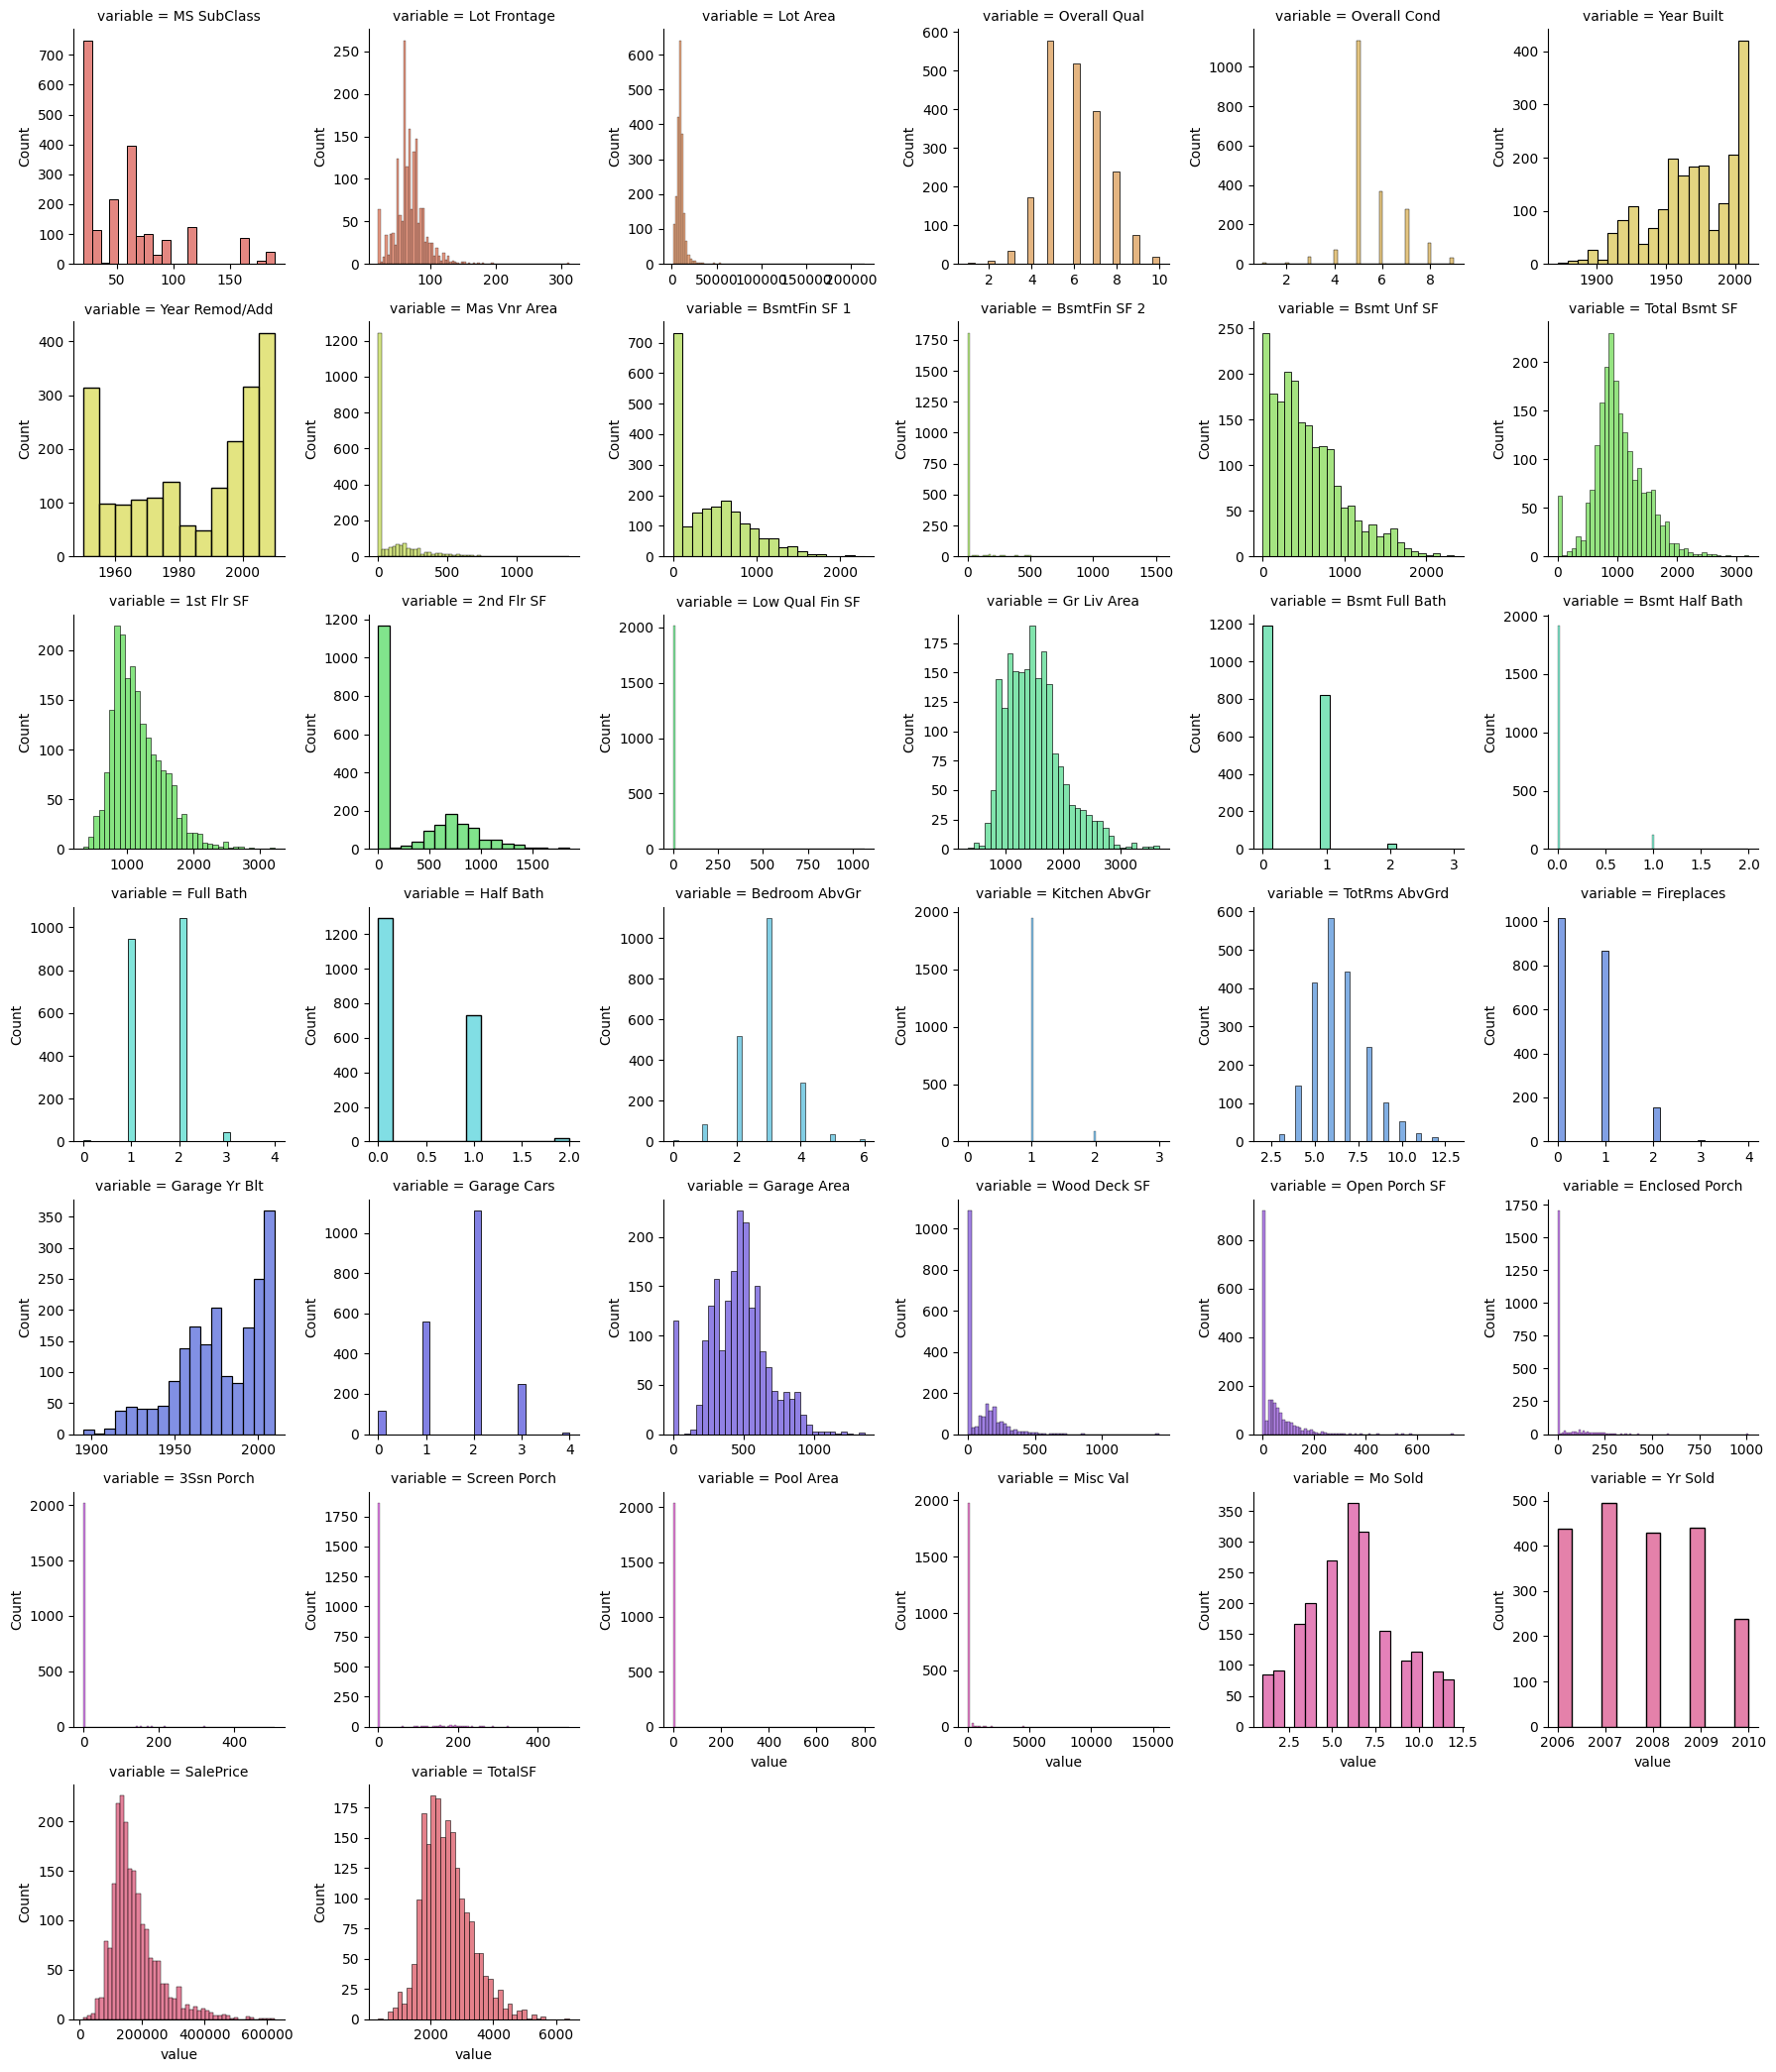

In [363]:
f = pd.melt(X_train, value_vars=numeric_cols_of_X_train)
palette = sns.color_palette("hls", len(numeric_cols_of_X_train))
grid = sns.FacetGrid(f, col='variable',  col_wrap=6, sharex=False, sharey=False, hue='variable', palette=palette)
grid = grid.map(sns.histplot, 'value')

**Có thể thấy, có một vài biến cần phải biến đổi log transformation như: TotalBsmtSF, KitchenAbvGr, LotFrontage, LotArea, ... Tiếp theo, chúng ta quan sát quan hệ giữa giá nhà với các giá trị định lượng thông qua biểu đồ scatter plot.**

**Qua phân tích các scatter plot, các biến như LotFrontage, LotArea, OverallQual, TotalBsmtSF, ... có quan hệ tuyến tính (linear) với SalePrice. Một số biến khác như BsmtFullBath, HalfBath, Fireplaces, ... lại có thể biễu diễn SalePrice thông qua phương trình bậc hai (quadratic equation).**

## **4.2 Qualitative Attributes**

`Đối với các biến định tính, box plot sẽ được sử dụng để phân tích phân bố của SalePrice đối với từng attribute trên BỘ DỮ LIỆU GỐC để đảm bảo loại bỏ hoàn toàn chúng cho cả bên tập test`

# **Stage 5: Phân tích đa biến**

`Đối với các mối quan hệ tương quan đối với biến mục tiêu, mối quan hệ nào có tương quan càng cao đồng nghĩa với khả năng dự báo càng chính xác. Vì vậy cần sàng lọc và loại bỏ những mối quan hệ có chỉ số tương quan thấp hơn 0.05(không mang ý nghĩa gì, không có tác dụng dự đoán biến mục tiêu).`

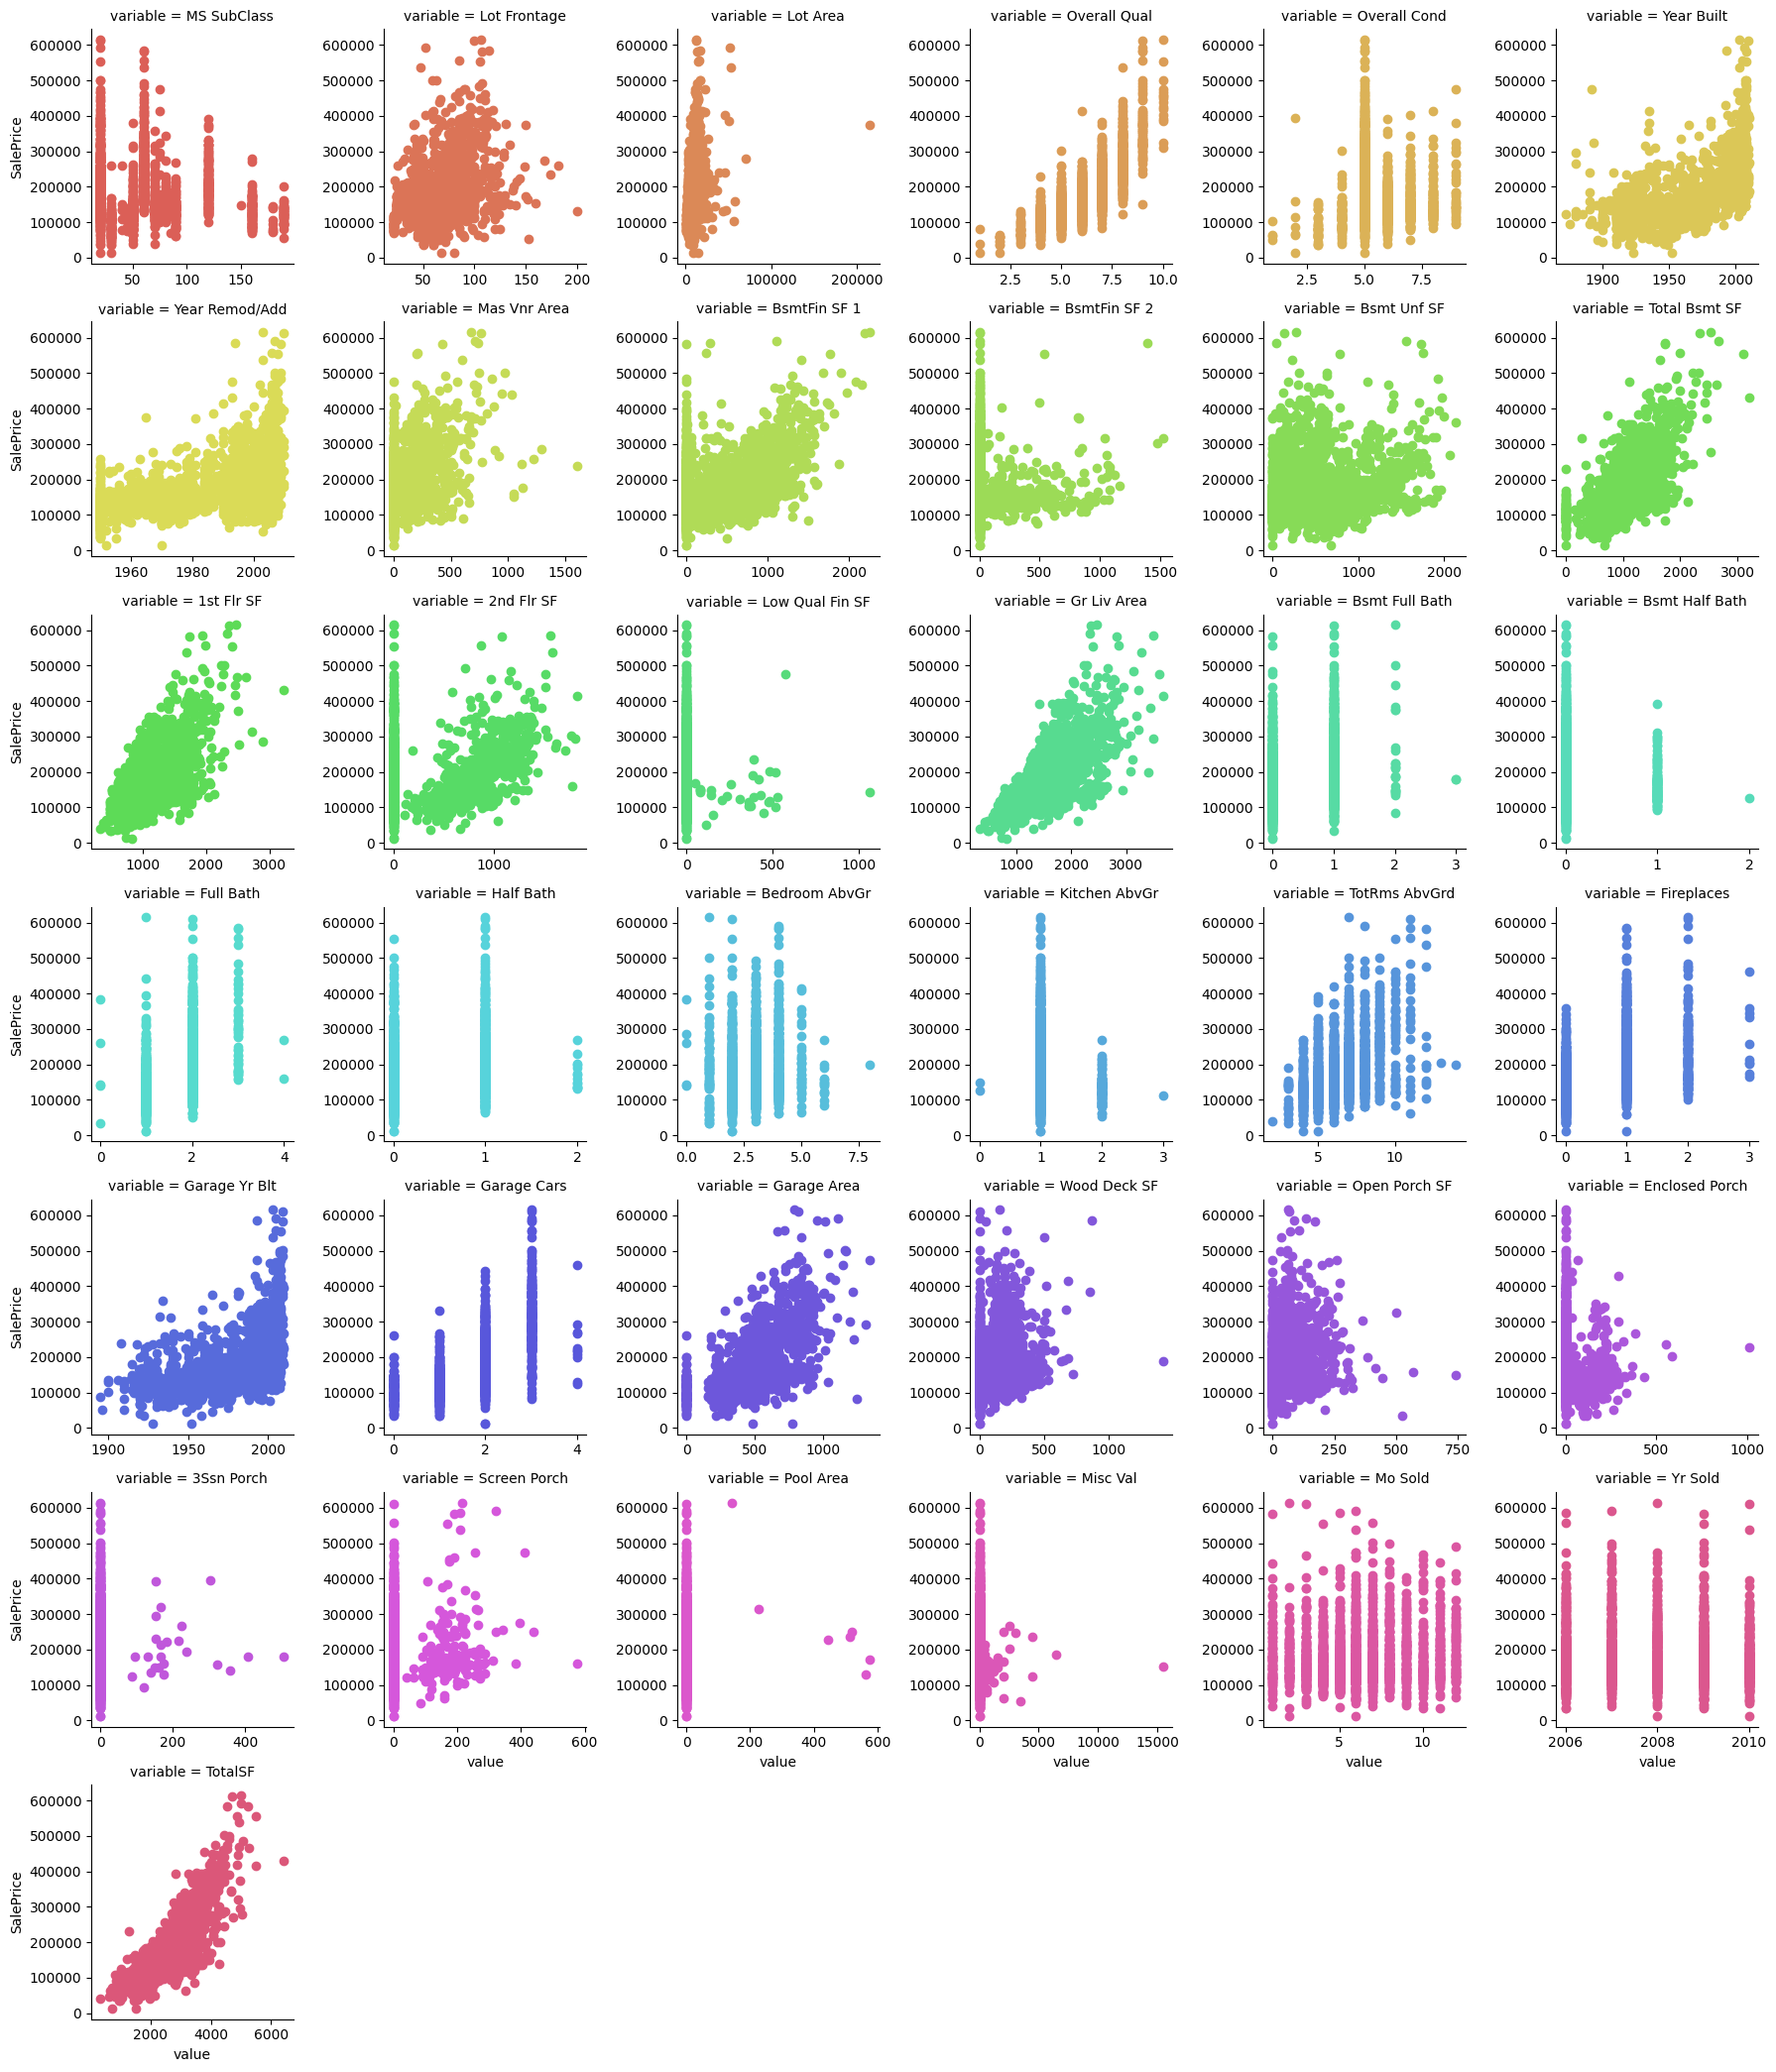

In [364]:
f = pd.melt(train_set, id_vars=['SalePrice'], value_vars=numeric_cols_of_X_train)
palette = sns.color_palette("hls", len(numeric_cols_of_X_train))
grid = sns.FacetGrid(f, col='variable',  col_wrap=6, sharex=False, sharey=False, hue='variable', palette=palette)
grid = grid.map(plt.scatter, 'value', 'SalePrice')

## **5.1 Kiểm tra và loại bỏ các Feature có tương quan với biến mục tiêu yếu**

In [365]:
train_analysis = X_train.copy()
train_analysis['SalePrice'] = y_train_log
corr_matrix = train_analysis.corr(method="pearson", numeric_only=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2928\3511011375.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='vlag')


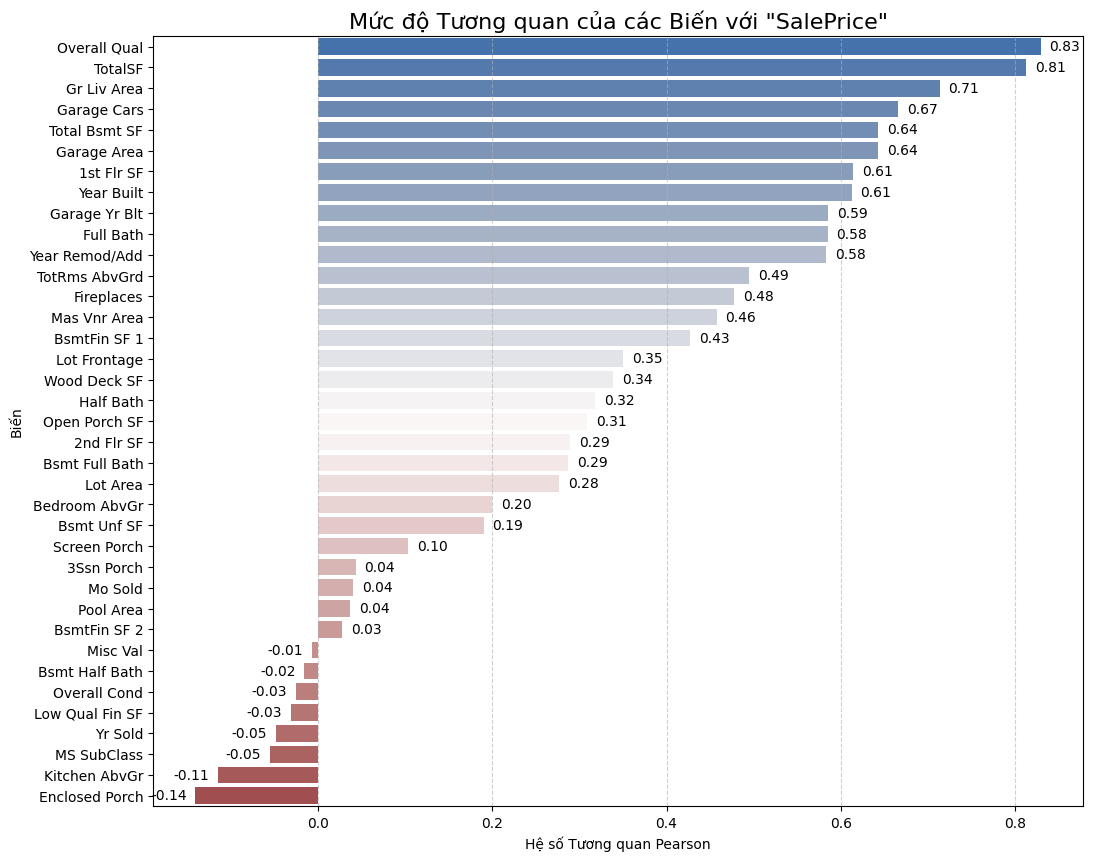

In [366]:
target_var = 'SalePrice'
corr_with_target = corr_matrix[target_var].sort_values(ascending=False)
corr_with_target = corr_with_target.drop(target_var)

plt.figure(figsize=(12, 10))
ax = sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='vlag')
plt.title(f'Mức độ Tương quan của các Biến với "{target_var}"', fontsize=16)
plt.xlabel('Hệ số Tương quan Pearson')
plt.ylabel('Biến')
plt.grid(axis='x', linestyle='--', alpha=0.6)
for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    if width > 0:
        x = width + 0.01
        ha = 'left'
    else:
        x = width - 0.01
        ha = 'right'
    ax.text(
        x=x,                 # Vị trí x
        y=y,                 # Vị trí y
        s=f'{width:.2f}',    # Văn bản cần hiển thị (làm tròn 2 chữ số)
        ha=ha,               # Căn lề ngang
        va='center',         # Căn lề dọc
        fontsize=10
    )
plt.show()

In [367]:
threshold = 0.1

low_corr_features = corr_with_target[abs(corr_with_target) < threshold]

sorted_corr = low_corr_features.sort_values(ascending=False)

print(f"--- CÁC BIẾN CÓ TƯƠNG QUAN TUYỆT ĐỐI VỚI '{target_var}' < {threshold} ---")
print("(Dấu hiệu của các biến có tương quan yếu với biến mục tiêu)")
if sorted_corr.empty:
    print("\nKhông tìm thấy biến nào vượt ngưỡng.")
else:
    print(sorted_corr.round(2))

--- CÁC BIẾN CÓ TƯƠNG QUAN TUYỆT ĐỐI VỚI 'SalePrice' < 0.1 ---
(Dấu hiệu của các biến có tương quan yếu với biến mục tiêu)
3Ssn Porch         0.04
Mo Sold            0.04
Pool Area          0.04
BsmtFin SF 2       0.03
Misc Val          -0.01
Bsmt Half Bath    -0.02
Overall Cond      -0.03
Low Qual Fin SF   -0.03
Yr Sold           -0.05
MS SubClass       -0.05
Name: SalePrice, dtype: float64


In [368]:
low_corr_threshold = 0.05

numeric_cols = X_train.select_dtypes(include=[np.number]).columns
correlations = X_train[numeric_cols].apply(lambda x: x.corr(y_train_log)).abs()

Noise_features = correlations[correlations < low_corr_threshold].index.tolist()

# Loại bỏ chúng
X_train = X_train.drop(columns=Noise_features)
X_test = X_test.drop(columns=Noise_features) # Nhớ drop cả ở Test
print(f"Đã loại bỏ {len(Noise_features)} biến rác (Tương quan < {low_corr_threshold}):")
print(Noise_features)
print(f"Số lượng biến còn lại: {X_train.shape[1]}")

Đã loại bỏ 9 biến rác (Tương quan < 0.05):
['Overall Cond', 'BsmtFin SF 2', 'Low Qual Fin SF', 'Bsmt Half Bath', '3Ssn Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']
Số lượng biến còn lại: 67


## **5.2 Kiểm tra ý nghĩa thống kê**

`Việc kiểm tra ý nghĩa thống kê giúp xác nhận rằng biến đó có thực sự có mối quan hệ tuyến tính với biến mục tiêu hay không. Phục vụ cho mục tiêu xử lí outlier, bởi vì chúng đã có mối quan hệ tuyến tính vậy nên chúng ta có thể loại bỏ các điểm không tuân theo mối quan hệ tuyến tính này(Các outlier do logic, ví dụ một ngôi nhà tuy có diện tích nhỏ nhưng giá lại siêu cao)`

In [369]:
from scipy.stats import pearsonr

high_corr_vars = corr_with_target[abs(corr_with_target) > 0.5]
vars_to_test = high_corr_vars.index.tolist()
results = []
alpha = 0.05 

for var in vars_to_test:
    temp_df = df[['SalePrice', var]].dropna()

    r, p_value = pearsonr(temp_df['SalePrice'], temp_df[var])
    is_significant = p_value < alpha

    results.append({
        'Biến số': var,
        'Hệ số Tương quan (r)': r,
        'P-value (Sig.)': p_value,
        'Có Ý nghĩa Thống kê (\alpha=0.05)': 'Có' if is_significant else 'Không'
    })

results_df = pd.DataFrame(results)

results_df['Hệ số Tương quan (r)'] = results_df['Hệ số Tương quan (r)'].map('{:,.4f}'.format)
results_df['P-value (Sig.)'] = results_df['P-value (Sig.)'].map('{:.2e}'.format)

print("KẾT QUẢ PHÂN TÍCH TƯƠNG QUAN VÀ KIỂM ĐỊNH GIẢ THUYẾT (BIẾN CÓ |r| > 0.5 VỚI SALECPRICE):")
print(results_df.to_markdown(index=False, numalign="left", stralign="left"))

KẾT QUẢ PHÂN TÍCH TƯƠNG QUAN VÀ KIỂM ĐỊNH GIẢ THUYẾT (BIẾN CÓ |r| > 0.5 VỚI SALECPRICE):
| Biến số        | Hệ số Tương quan (r)   | P-value (Sig.)   | Có Ý nghĩa Thống kê (lpha=0.05)    |
|:---------------|:-----------------------|:-----------------|:---|
| Overall Qual   | 0.8057                 | 0                | Có |
| TotalSF        | 0.8283                 | 0                | Có |
| Gr Liv Area    | 0.7203                 | 0                | Có |
| Garage Cars    | 0.6572                 | 0                | Có |
| Total Bsmt SF  | 0.6606                 | 0                | Có |
| Garage Area    | 0.6547                 | 0                | Có |
| 1st Flr SF     | 0.6453                 | 0                | Có |
| Year Built     | 0.565                  | 5.38e-246        | Có |
| Garage Yr Blt  | 0.539                  | 6.27e-208        | Có |
| Full Bath      | 0.5437                 | 2.48e-224        | Có |
| Year Remod/Add | 0.5398                 | 1.7e-220         |

`Sau khi có được bảng kết quả, chúng ta có thể thấy rằng có 10 biến số có hệ số tương quan với giá bán (SalePrice) lớn hơn 0.5. Các biến này bao gồm: OverallQual, GrLivArea, GarageCars, TotalBsmtSF, Garage Area , 1stFlrSF,  Year Built, Year Remod/Add, FullBath, và Garage Yr Blt.`

`Bởi vì đây là các biến có tác động mạnh mẽ nhất đối với biến mục tiêu, vậy nên các bước xử lí về Outlier hoặc Missing Value sẽ được áp dụng cho các biến này.`

`Nhờ vào kết quả này, tôi sẽ có thể bắt đầu kiểm tra các Lỗi Logic (Logical Error) của các biến này`

## **5.4 Kiểm tra Mối quan hệ Thời gian (Temporal Consistency)**


`Kiểm tra xem các mốc thời gian có tuân theo thứ tự logic hay không. Kiểm tra xem một căn nhà có bị cải tạo (remodel) trước khi nó được xây dựng (built) hay không.`

In [370]:
illogical_temporal = checking_error[checking_error['Year Remod/Add'] < checking_error['Year Built']]

print(f"A. Số lượng Lỗi Logic (Year Remod/Add < Year Built): {len(illogical_temporal)}")
if not illogical_temporal.empty:
    print("   - Chi tiết hàng lỗi (cần điều tra):")
    print(illogical_temporal[['Order', 'Year Built', 'Year Remod/Add']].to_markdown(index=False))

A. Số lượng Lỗi Logic (Year Remod/Add < Year Built): 1
   - Chi tiết hàng lỗi (cần điều tra):
|   Order |   Year Built |   Year Remod/Add |
|--------:|-------------:|-----------------:|
|     851 |         2002 |             2001 |


**Nhận thấy Hàng $\text{Order}=851$ là một lỗi logic rõ ràng khi năm tu sửa lại nhà lại trước khi nó được xây dựng. Tiến hành xoá bỏ hàng này ở cột dữ liệu gốc**

## **5.5 Kiểm tra logic của 10 biến kia**


`Kiểm tra các lỗi về mặt logic của các biến có độ tương quan cao với biến mục tiêu mà vừa tìm ra ở step trên bằng cách sử dụng biểu đồ phân tán (Scatter Plot) để xem xét mối quan hệ giữa từng biến đó với biến mục tiêu`

## 📊 Phân tích Outlier cho nhóm features: Overall Qual, Gr Liv Area
--------------------------------------------------
### Không có điểm cực đoan cho 'Overall Qual' (với ngưỡng > 0.999).
--------------------------------------------------
### Điểm cực đoan (Outliers) của 'Gr Liv Area' (Top 0.1% lớn nhất):
      Order  Gr Liv Area  SalePrice
1498   1499         5642     160000
2180   2181         5095     183850
2181   2182         4676     184750
--------------------------------------------------


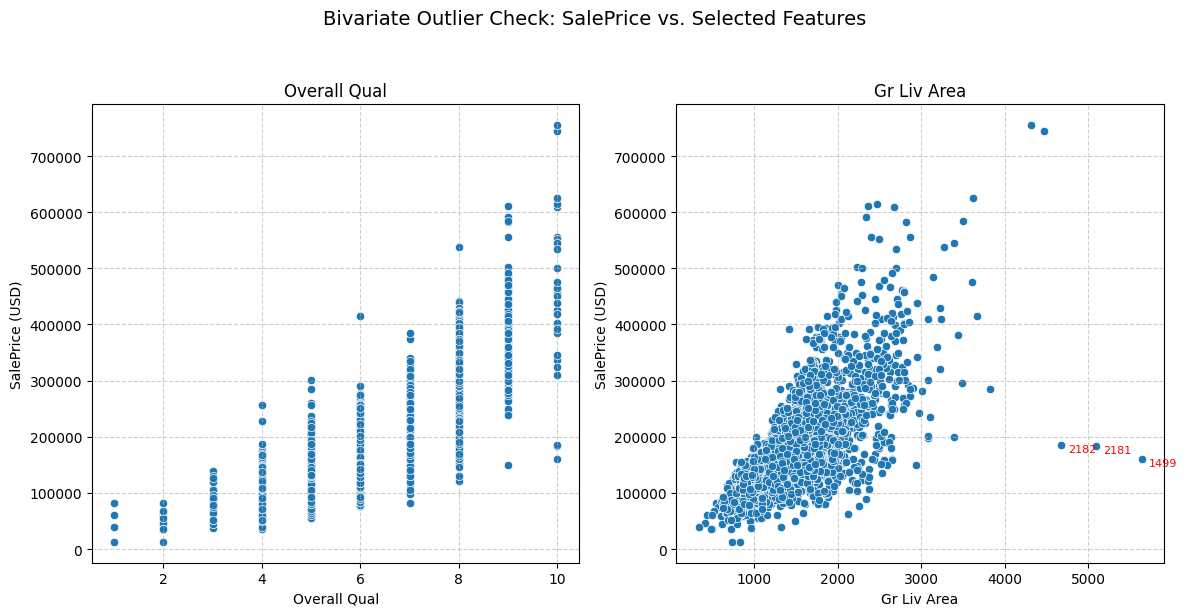



## 📊 Phân tích Outlier cho nhóm features: Garage Cars, Total Bsmt SF
--------------------------------------------------
### Điểm cực đoan (Outliers) của 'Garage Cars' (Top 0.1% lớn nhất):
     Order  Garage Cars  SalePrice
746    747          5.0     126500
--------------------------------------------------
### Điểm cực đoan (Outliers) của 'Total Bsmt SF' (Top 0.1% lớn nhất):
      Order  Total Bsmt SF  SalePrice
1498   1499         6110.0     160000
2180   2181         5095.0     183850
444     445         3206.0     284000
--------------------------------------------------


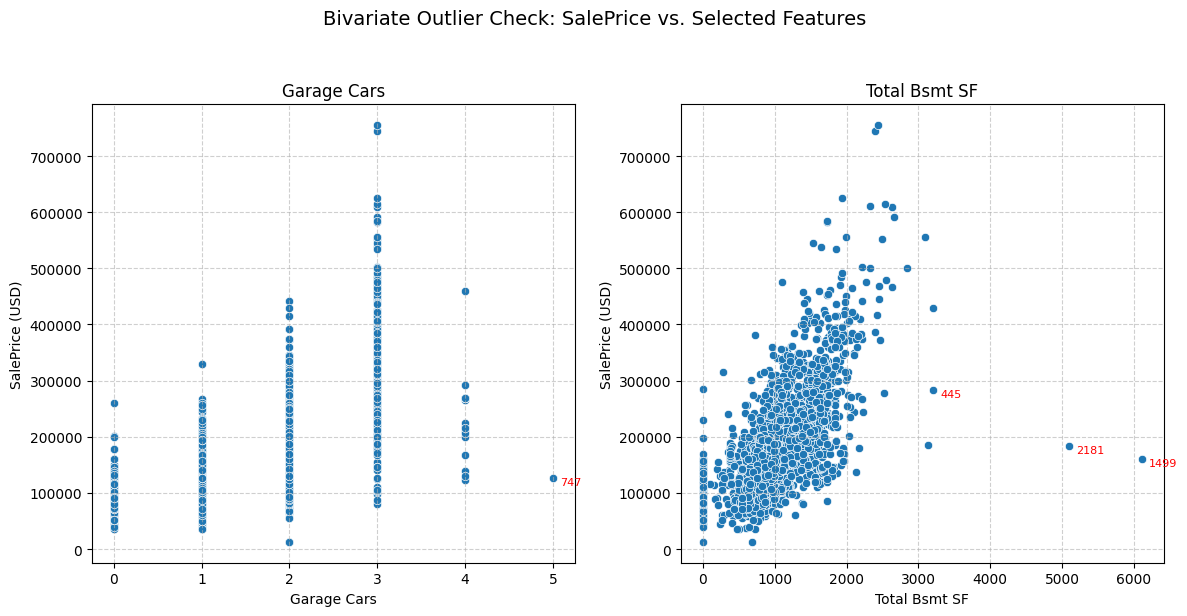



## 📊 Phân tích Outlier cho nhóm features: Garage Area, 1st Flr SF
--------------------------------------------------
### Điểm cực đoan (Outliers) của 'Garage Area' (Top 0.1% lớn nhất):
      Order  Garage Area  SalePrice
1258   1259       1488.0     139000
1498   1499       1418.0     160000
426     427       1390.0     253293
--------------------------------------------------
### Điểm cực đoan (Outliers) của '1st Flr SF' (Top 0.1% lớn nhất):
      Order  1st Flr SF  SalePrice
1498   1499        4692     160000
2180   2181        5095     183850
1497   1498        3820     284700
--------------------------------------------------


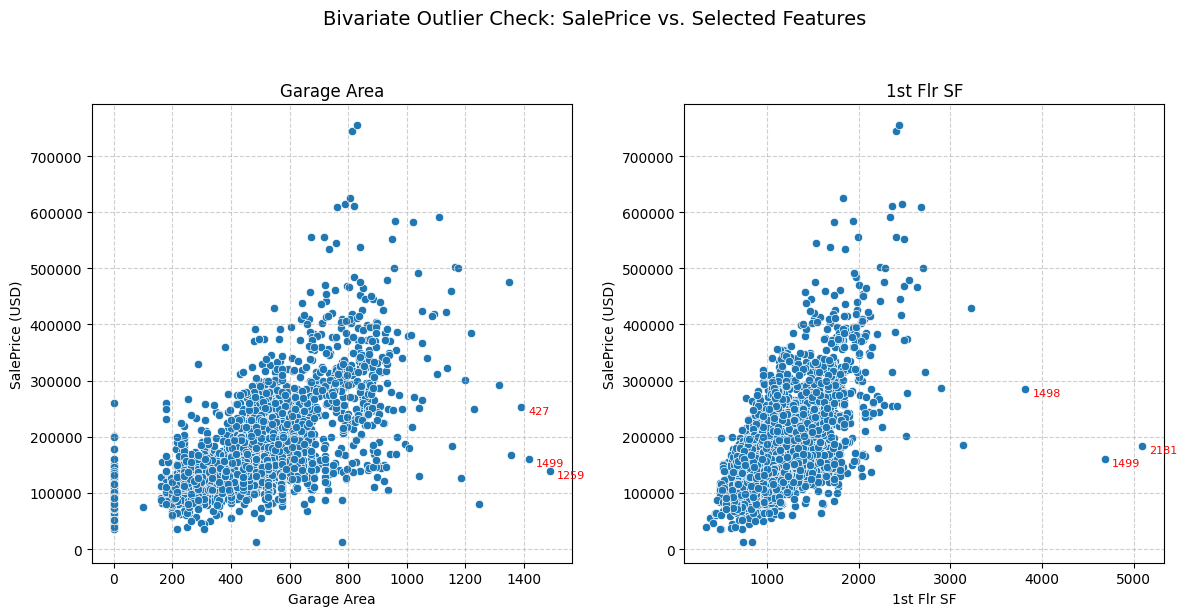



## 📊 Phân tích Outlier cho nhóm features: Year Built, Year Remod/Add
--------------------------------------------------
### Điểm cực đoan (Outliers) của 'Year Built' (Top 0.1% lớn nhất):
     Order  Year Built  SalePrice
252    253        2010     187000
104    105        2010     267916
17      18        2010     394432
--------------------------------------------------
### Không có điểm cực đoan cho 'Year Remod/Add' (với ngưỡng > 0.999).
--------------------------------------------------


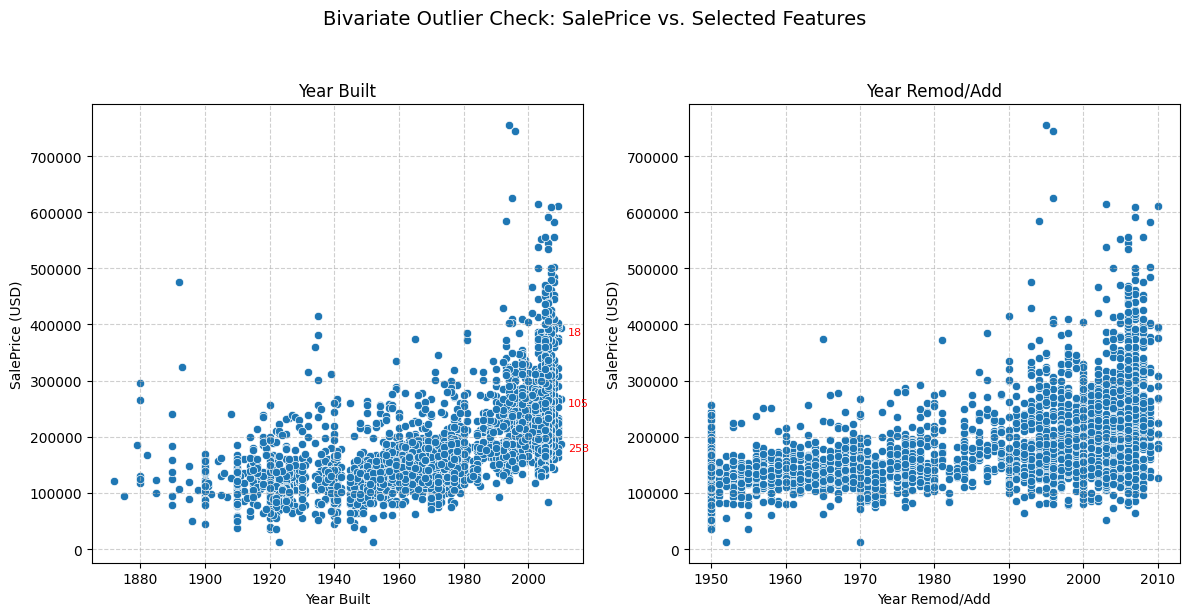



## 📊 Phân tích Outlier cho nhóm features: Full Bath, Garage Yr Blt
--------------------------------------------------
### Không có điểm cực đoan cho 'Full Bath' (với ngưỡng > 0.999).
--------------------------------------------------
### Điểm cực đoan (Outliers) của 'Garage Yr Blt' (Top 0.1% lớn nhất):
      Order  Garage Yr Blt  SalePrice
2260   2261         2207.0     267300
--------------------------------------------------


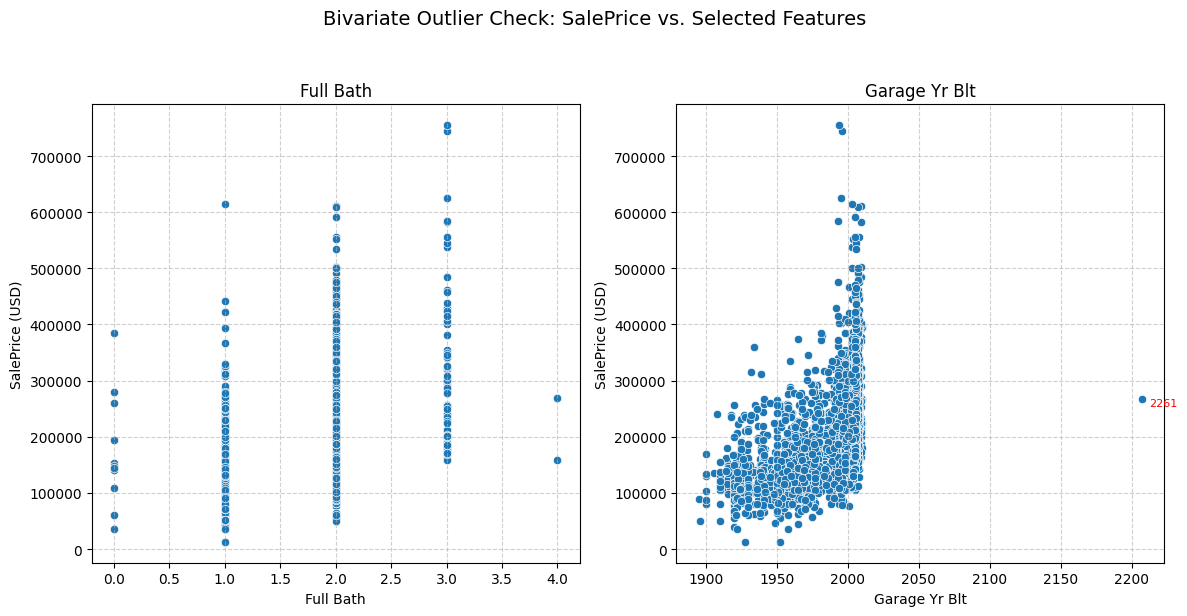

In [371]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
# Giả định: checking_error là DataFrame của bạn

features_to_check = [
    'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', 'Garage Area', '1st Flr SF', 
    'Year Built', 'Year Remod/Add', 'Full Bath', 'Garage Yr Blt'
]

# --- Vòng lặp để tạo và hiển thị biểu đồ theo nhóm 3 features ---
for i in range(0, len(features_to_check), 2):
    
    current_features = features_to_check[i:i + 2]
    num_plots = len(current_features)
    
    fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 6))

    if num_plots == 1:
        axes = [axes]
    
    print(f"## 📊 Phân tích Outlier cho nhóm features: {', '.join(current_features)}")
    print("-" * 50)
    
    # Lặp qua các features và trục tương ứng để vẽ
    for j, feature in enumerate(current_features):
        
        ax = axes[j]
        
        # 1. Vẽ biểu đồ phân tán
        sns.scatterplot(x=feature, y='SalePrice', data=checking_error, ax=ax)
        
        # 2. Đặt tiêu đề và nhãn trục
        ax.set_title(f'{feature}', fontsize=12) # Đặt tên feature làm tiêu đề
        ax.set_xlabel(f'{feature}', fontsize=10)
        ax.set_ylabel('SalePrice (USD)', fontsize=10)
        
        # 3. Xác định các điểm cực đoan (Outliers)
        extreme_value = checking_error[feature].quantile(0.999)
        # Chỉ lấy cột cần thiết để in ra
        outliers_to_note = checking_error[checking_error[feature] > extreme_value].sort_values(by='SalePrice')
        
        # 4. Đánh dấu các điểm cực đoan trên đồ thị
        for k in range(len(outliers_to_note)):
            ax.annotate(
                f"{outliers_to_note['Order'].iloc[k]}",
                (outliers_to_note[feature].iloc[k], outliers_to_note['SalePrice'].iloc[k]),
                textcoords="offset points", 
                xytext=(5, -5),              
                ha='left',                   
                fontsize=8,                  
                color='red'                  
            )
        # --- THÊM IN ẤN DỮ LIỆU CỦA OUTLIERS VÀO ĐÂY ---
        if not outliers_to_note.empty:
            print(f"### Điểm cực đoan (Outliers) của '{feature}' (Top 0.1% lớn nhất):")
            # In ra các cột quan trọng của outlier: ID (Order), feature đang xét, và SalePrice
            display_cols = ['Order', feature, 'SalePrice'] 
            # Dùng .to_string() để in đầy đủ DataFrame nếu bạn chạy trong môi trường console/script
            # Nếu chạy trong Jupyter/Colab, chỉ cần outliers_to_note[display_cols]
            print(outliers_to_note[display_cols].to_string())
        else:
            print(f"### Không có điểm cực đoan cho '{feature}' (với ngưỡng > 0.999).")
        print("-" * 50)
        ax.grid(True, linestyle='--', alpha=0.6)

    plt.suptitle('Bivariate Outlier Check: SalePrice vs. Selected Features', y=1.02, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Điều chỉnh layout để tiêu đề chung không bị cắt
    plt.show() 
    print("\n" + "=" * 120 + "\n")

**Tổng hợp ID của các điểm cực đoan:**

* `Gr Liv Area` : 1498, 2180, 2181

* `Garage Cars` : 746

* `Total Bsmt SF` : 1498, 2180

* `Garage Area` : 1258, 1498, 426

* `1st Flr SF` : 1498, 2180, 1497

* `Garage Yr Blt` : 2260


**Sau khi xác định được các điểm cực đoan được xác định bởi lỗi logic, quay về xoá chúng ở bộ dữ liệu gốc**

In [372]:
print(df[1497:1499].to_markdown(index=True))

|      |   MS SubClass | MS Zoning   |   Lot Frontage |   Lot Area | Street   | Lot Shape   | Land Contour   | Utilities   | Lot Config   | Land Slope   | Neighborhood   | Condition 1   | Condition 2   | Bldg Type   | House Style   |   Overall Qual |   Overall Cond |   Year Built |   Year Remod/Add | Roof Style   | Roof Matl   | Exterior 1st   | Exterior 2nd   | Mas Vnr Type   |   Mas Vnr Area | Exter Qual   | Exter Cond   | Foundation   | Bsmt Qual   | Bsmt Cond   | Bsmt Exposure   | BsmtFin Type 1   |   BsmtFin SF 1 | BsmtFin Type 2   |   BsmtFin SF 2 |   Bsmt Unf SF |   Total Bsmt SF | Heating   | Heating QC   | Central Air   | Electrical   |   1st Flr SF |   2nd Flr SF |   Low Qual Fin SF |   Gr Liv Area |   Bsmt Full Bath |   Bsmt Half Bath |   Full Bath |   Half Bath |   Bedroom AbvGr |   Kitchen AbvGr | Kitchen Qual   |   TotRms AbvGrd | Functional   |   Fireplaces |   Garage Type |   Garage Yr Blt |   Garage Finish |   Garage Cars |   Garage Area |   Garage Qual |   Garage Cond

Việc xóa chỉ một dòng dữ liệu mà lại làm cho lỗi căn bậc hai trung bình (RMSE) tăng đáng kể (từ $24,000$ lên $26,000) trong bài toán dự đoán giá nhà cho thấy dòng dữ liệu đó có thể là một điểm dữ liệu cực kỳ quan trọng (an influential or leverage point) hoặc giá trị ngoại lai (outlier) mà mô hình của bạn đã học quá mức (overfit) hoặc đã sử dụng để hiệu chỉnh (calibrate) rất tốt.

## **5.5 Kiểm tra đa cộng tuyến**

`Đối với các mối quan hệ tương quan không phải là với biến mục tiêu, mối quan hệ nào có tương quan càng cao đồng nghĩa với khả năng bị đa cộng tuyến càng lớn bởi chúng cùng thể hiện một thông tin. Vì vậy cần sàng lọc và loại bỏ 1 trong 2 biến của mối quan hệ có chỉ số tương quan thấp. Threshold được lựa chọn sẽ là những cặp mối quan hệ có tương quan lớn hơn 0.7. Những mối quan hệ càng thấp sẽ được ưu tiên giữ lại vì nó thể hiện rằng 2 biến đó không liên quan đến nhau, tránh bị đa cộng tuyến. Việc loại bỏ 1 biến và chỉ giữ lại 1 biến giúp làm sạch giữ liệu và giảm chiều.`

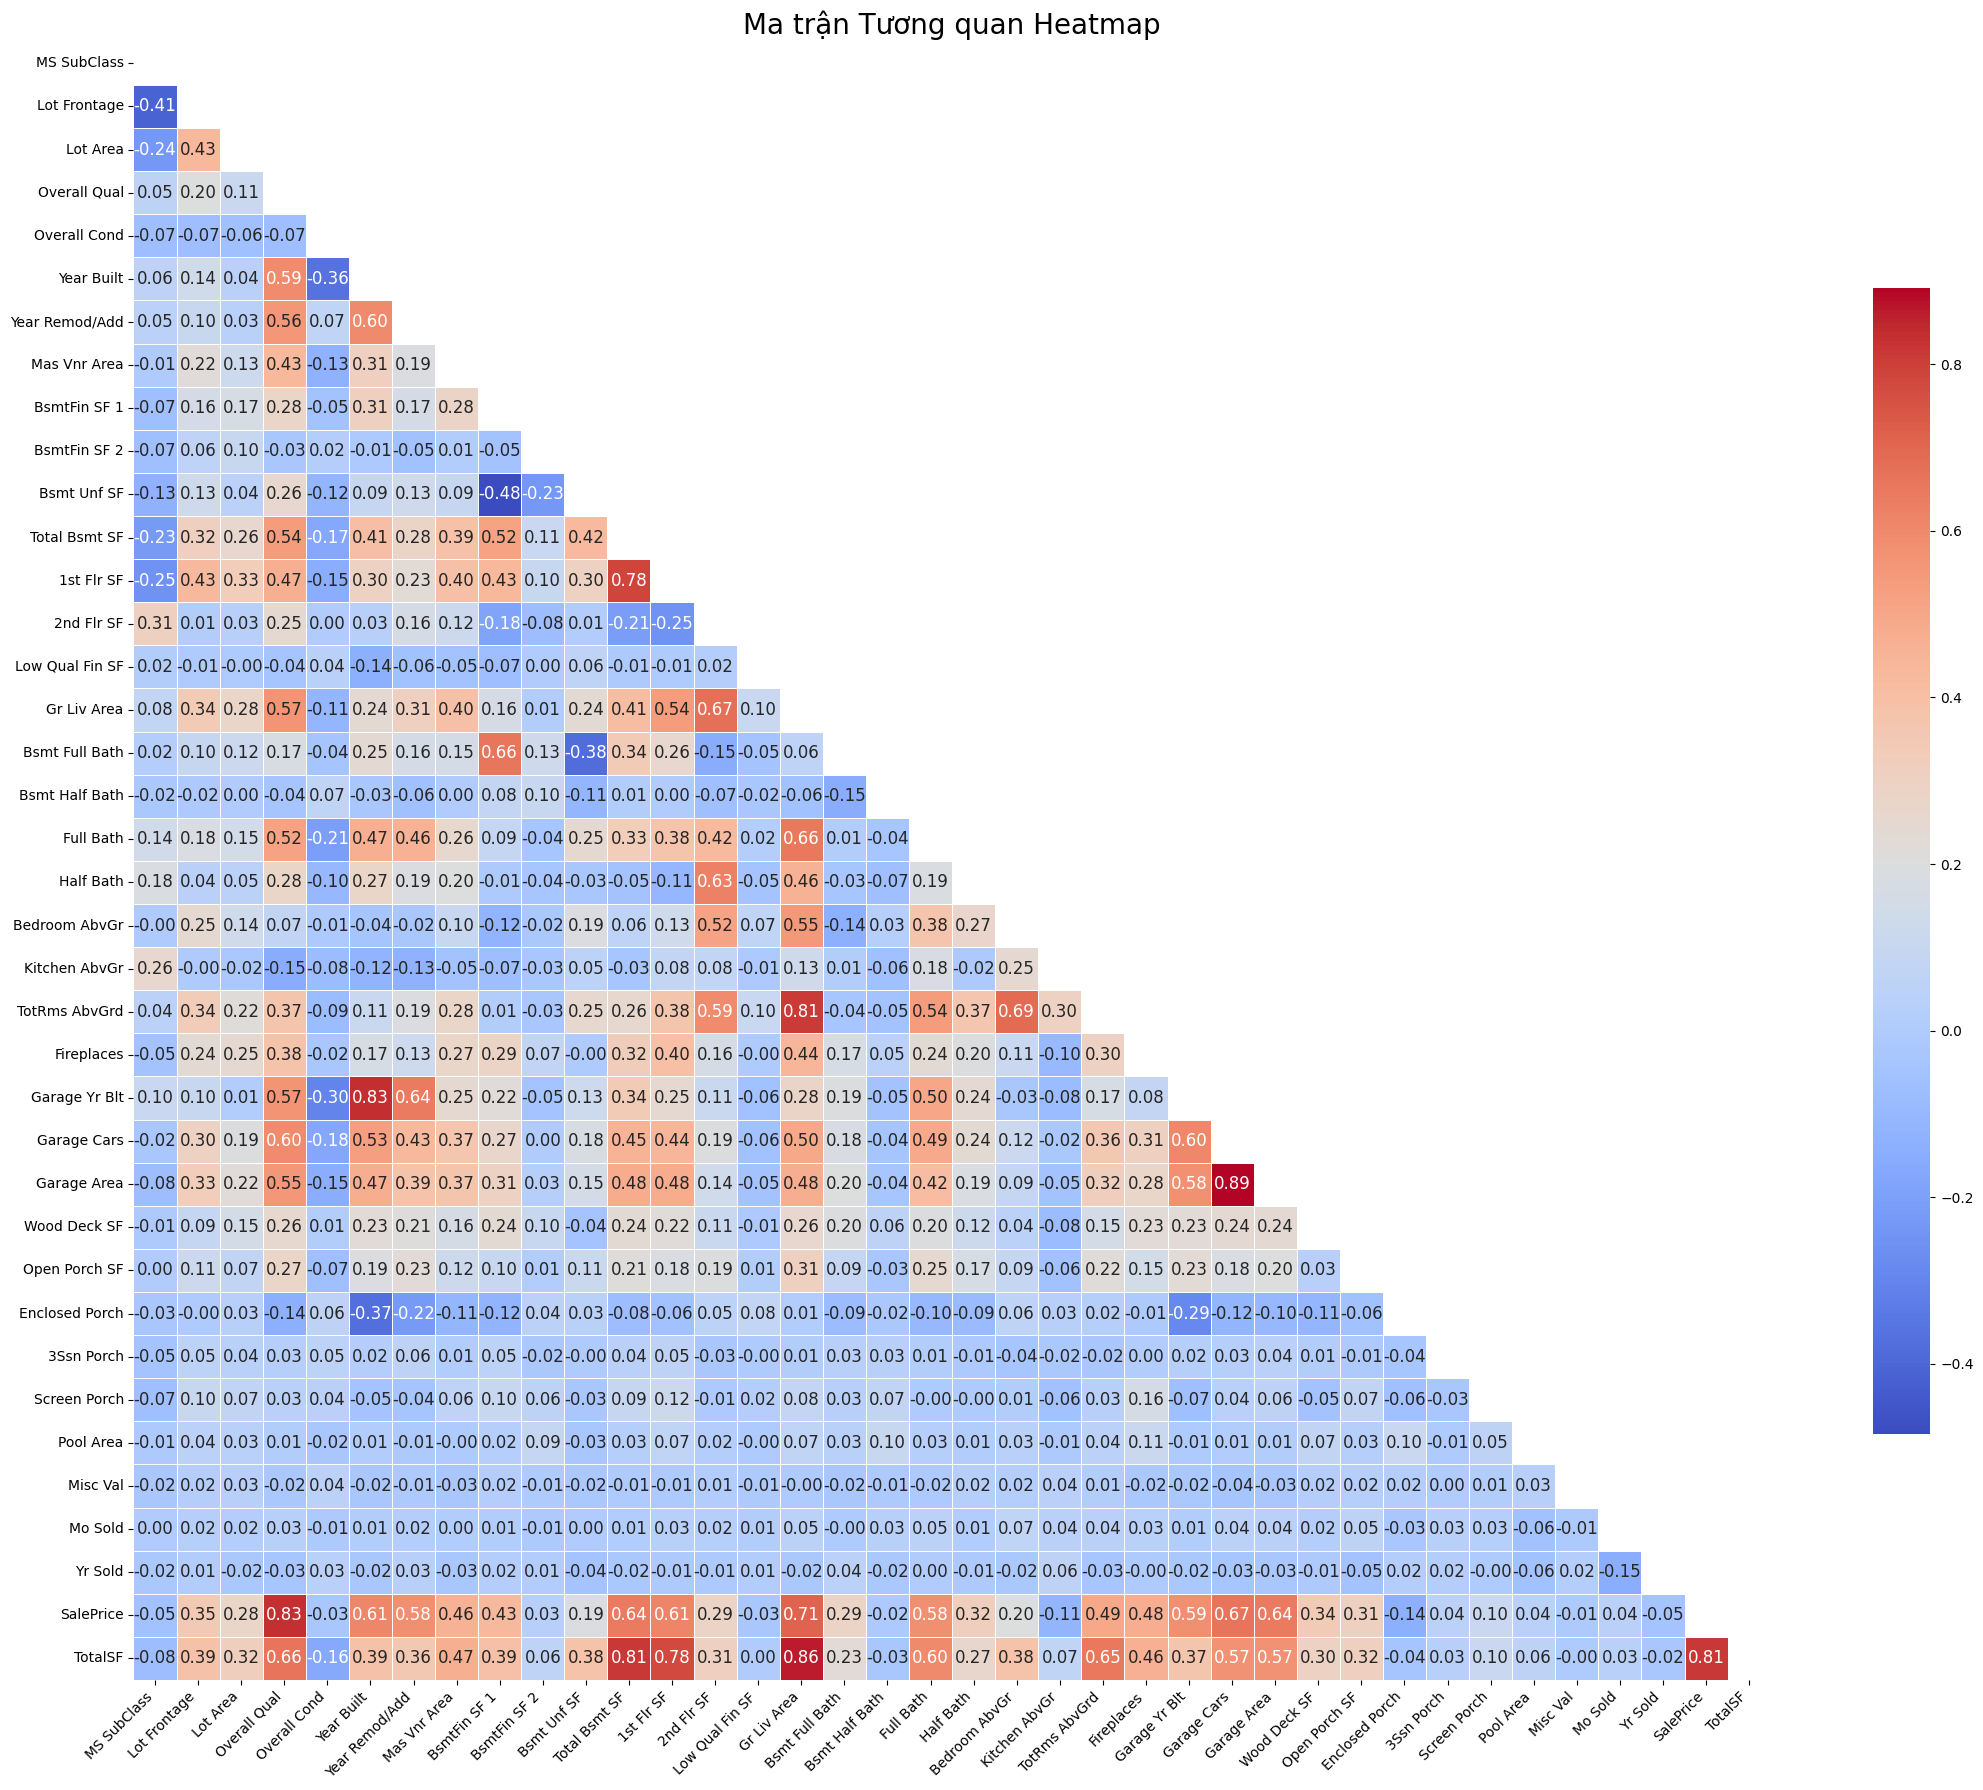

In [373]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(22, 18)) 
sns.heatmap(
    corr_matrix, 
    mask=mask,              
    cmap='coolwarm',
    annot=True,              
    fmt='.2f',              
    annot_kws={"size": 12},         
    linewidths=.5,
    cbar_kws={"shrink": .7}  
)
plt.title('Ma trận Tương quan Heatmap', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [374]:
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
stacked_corr = upper_triangle.stack()
sorted_pairs_by_strength = stacked_corr.sort_values(key=pd.Series.abs, ascending=False)
print(sorted_pairs_by_strength.round(2).to_string())

Garage Cars      Garage Area        0.89
Gr Liv Area      TotalSF            0.86
Year Built       Garage Yr Blt      0.83
Overall Qual     SalePrice          0.83
Total Bsmt SF    TotalSF            0.81
SalePrice        TotalSF            0.81
Gr Liv Area      TotRms AbvGrd      0.81
Total Bsmt SF    1st Flr SF         0.78
1st Flr SF       TotalSF            0.78
Gr Liv Area      SalePrice          0.71
Bedroom AbvGr    TotRms AbvGrd      0.69
2nd Flr SF       Gr Liv Area        0.67
Garage Cars      SalePrice          0.67
Overall Qual     TotalSF            0.66
BsmtFin SF 1     Bsmt Full Bath     0.66
Gr Liv Area      Full Bath          0.66
TotRms AbvGrd    TotalSF            0.65
Year Remod/Add   Garage Yr Blt      0.64
Total Bsmt SF    SalePrice          0.64
Garage Area      SalePrice          0.64
2nd Flr SF       Half Bath          0.63
1st Flr SF       SalePrice          0.61
Year Built       SalePrice          0.61
Garage Yr Blt    Garage Cars        0.60
Full Bath       

In [375]:
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
stacked_corr = upper_triangle.stack()
# Lọc Series này để chỉ giữ lại các giá trị có tương quan tuyệt đối > ngưỡng
high_corr_pairs = stacked_corr[abs(stacked_corr) > 0.7]
# Sắp xếp lại để các cặp cao nhất/thấp nhất hiện lên đầu
sorted_pairs = high_corr_pairs.sort_values(ascending=False)

print(f"--- CÁC CẶP BIẾN CÓ TƯƠNG QUAN TUYỆT ĐỐI > 0.7 ---")
print("(Dấu hiệu của Đa cộng tuyến cần xử lý)")
display(sorted_pairs.round(2))

--- CÁC CẶP BIẾN CÓ TƯƠNG QUAN TUYỆT ĐỐI > 0.7 ---
(Dấu hiệu của Đa cộng tuyến cần xử lý)


Garage Cars    Garage Area      0.89
Gr Liv Area    TotalSF          0.86
Year Built     Garage Yr Blt    0.83
Overall Qual   SalePrice        0.83
Total Bsmt SF  TotalSF          0.81
SalePrice      TotalSF          0.81
Gr Liv Area    TotRms AbvGrd    0.81
Total Bsmt SF  1st Flr SF       0.78
1st Flr SF     TotalSF          0.78
Gr Liv Area    SalePrice        0.71
dtype: float64

In [376]:
# Danh sách các cột cần loại bỏ do đa cộng tuyến (Multicollinearity)
Multicollinearity = ['Garage Area', 'Garage Yr Blt', 'TotRms AbvGrd', '1st Flr SF']

# Thực hiện loại bỏ trên cả tập Train và Test
# (Lưu ý: Chỉ drop nếu cột đó có trong DataFrame để tránh lỗi)
X_train = X_train.drop(columns=[c for c in Multicollinearity if c in X_train.columns])
X_test = X_test.drop(columns=[c for c in Multicollinearity if c in X_test.columns])

print(f"Đã loại bỏ {len(Multicollinearity)} biến thừa: {Multicollinearity}")
print(f"Số lượng biến còn lại: {X_train.shape[1]}")

Đã loại bỏ 4 biến thừa: ['Garage Area', 'Garage Yr Blt', 'TotRms AbvGrd', '1st Flr SF']
Số lượng biến còn lại: 63


Trong khi chúng tôi kiên quyết loại bỏ các cặp biến thừa (như Garage Area) để tránh đa cộng tuyến, chúng tôi giữ lại và coi trọng Overall Qual. Mặc dù nó có tương quan rất cao với giá nhà (0.80), nhưng đây là tương quan 'lành mạnh' - phản ánh khả năng dự báo xuất sắc của biến này, chứ không phải sự dư thừa dữ liệu.

In [377]:
numeric_cols_of_X_train = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols_of_X_train = X_train.select_dtypes(include=['object']).columns.tolist()
    
print(f"Số biến numeric: {len(numeric_cols_of_X_train)}")
print(f"Số biến categorical: {len(categorical_cols_of_X_train)}")

Số biến numeric: 25
Số biến categorical: 38


# **Stage 5: Data Preprocessing Pipeline**

In [378]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Điền missing bằng trung vị
    ('scaler', StandardScaler())                   # Chuẩn hóa
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # Điền missing
    ('encoder', OneHotEncoder(handle_unknown='ignore')) # Mã hóa One-hot
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols_of_X_train),
        ('cat', categorical_transformer, categorical_cols_of_X_train)
    ])

# **Stage 6 & 7: Feature Selection & Modeling**

In [379]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectPercentile(f_regression, percentile=50)), # Giữ lại 50% đặc trưng tốt nhất
    ('regressor', LinearRegression())
])

# **Stage 8: Final Evaluation**

`Kiểm tra năng lực thực tế trên Test Set (Dữ liệu chưa bao giờ được nhìn thấy).`

In [380]:
from sklearn.metrics import mean_absolute_error
# 1. Huấn luyện lại trên toàn bộ tập Train
model_pipeline.fit(X_train, y_train_log)

# 2. Dự báo trên tập Test
y_pred_log = model_pipeline.predict(X_test)

# 3. Chuyển đổi giá trị dự báo từ Log về USD thực tế
# Dùng np.expm1 để nghịch đảo lại np.log1p
y_pred_raw = np.expm1(y_pred_log) 
y_test_raw = y_raw.loc[y_test_log.index]
# y_test_raw là giá trị thực tế (USD), không cần log

# 4. Đánh giá chỉ số trên đơn vị USD
rmse_dollar = np.sqrt(mean_squared_error(y_test_raw, y_pred_raw))
mae_dollar = mean_absolute_error(y_test_raw, y_pred_raw)
r2 = r2_score(y_test_raw, y_pred_raw)

print("------------------------------------------------")
print(f"Linear Regression - Real RMSE: ${rmse_dollar:,.2f}")
print(f"Linear Regression - Real MAE: ${mae_dollar:,.2f}")
print(f"Linear Regression - R2 Score: {r2:.4f}")
print("------------------------------------------------")

------------------------------------------------
Linear Regression - Real RMSE: $23,055.15
Linear Regression - Real MAE: $9,644.42
Linear Regression - R2 Score: 0.9076
------------------------------------------------


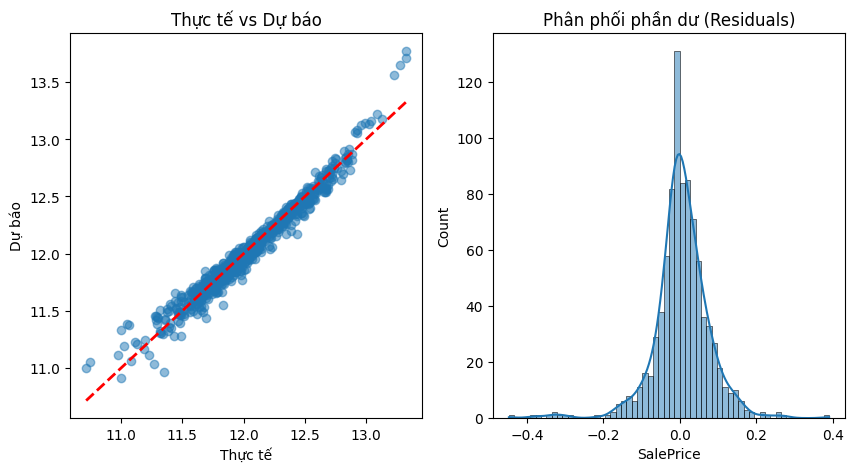

In [381]:
# [PHẦN BỔ SUNG CHO LINEAR REGRESSION]: Kiểm tra các giả định
# Linear Regression cần kiểm tra xem phần dư (Residuals) có phân phối chuẩn không
residuals = y_test_log - y_pred_log

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(y_test_log, y_pred_log, alpha=0.5)
plt.plot([y_test_log.min(), y_test_log.max()], [y_test_log.min(), y_test_log.max()], 'r--', lw=2)
plt.xlabel('Thực tế')
plt.ylabel('Dự báo')
plt.title('Thực tế vs Dự báo')

plt.subplot(1,2,2)
sns.histplot(residuals, kde=True)
plt.title('Phân phối phần dư (Residuals)')
plt.show()